# <a id='toc1_'></a>[COVID-19 Prediction](#toc0_)

Sam Celarek  
Data Science   
scelarek@gmail.com  

June 4th, 2023


**Table of contents**<a id='toc0_'></a>    
- [COVID-19 Prediction](#toc1_)    
- [1. Introduction](#toc2_)    
  - [1.1. Key Questions](#toc2_1_)    
  - [1.2. Data Sources and Methods](#toc2_2_)    
- [2. Setup and Data Collection](#toc3_)    
  - [CovSIRPhy Dataset Loading](#toc3_1_)    
- [Data Loading](#toc4_)    
    - [CovSIRPhy Dataset Cleaning](#toc4_1_1_)    
    - [Owid Dataset](#toc4_1_2_)    
  - [Google Datasets Loading and Cleaning](#toc4_2_)    
    - [Mobility Data](#toc4_2_1_)    
    - [Weather Data](#toc4_2_2_)    
    - [Government Response](#toc4_2_3_)    
    - [Hospitalization Data](#toc4_2_4_)    
    - [Final Merging of Datasets](#toc4_2_5_)    
    - [Master Cleaning](#toc4_2_6_)    
- [Resume Here](#toc5_)    
    - [Remaining Null Values: Early Missing Data](#toc5_1_1_)    
    - [Remaining Null Values: Later Missing Data](#toc5_1_2_)    
  - [Feature Engineering](#toc5_2_)    
- [***DATA LEAKAGE ALERT***](#toc6_)    
    - [Extra Code](#toc6_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[1. Introduction](#toc0_)

Three years ago, the emergence of COVID-19 drastically impacted the world. While COVID-19 was a significant challenge, the overarching threat of pandemics looms even larger. Experts from esteemed organizations like the WHO, alongside various independent research teams, have highlighted pandemics as one of the most significant threats to humanity. The statistics are daunting: there's a 1 in 30 chance that a pandemic could pose severe challenges to our existence in the upcoming century.


## <a id='toc2_1_'></a>[1.1. Key Goals](#toc0_)

My goal with this project is straightforward: **Predict to Protect**. If we can anticipate the spread of a pandemic at its onset, we stand a better chance of mitigating its impact. COVIDCast is unique, leveraging the principles of the epidemiological SIRD model combined with advanced time series forecasting algorithms like ARIMA, SARIMA, SARIMAX, and the Prophet model.

- **Time series forecasting algorithms:** The ARIMA and Prophet models predict future trends using the moving average, recent values, and differencing to predict the value of the target variable at the next time step. These models can also incorporate the information gained from seasonality and exogenous variables -- which is where the Epidemiological Models come in. 
- **Epidemiological Model Overview**: Traditional epidemiological container models, such as the SIRD (Susceptible, Infected, Recovered, Deceased), offer foundational insights into disease spread in real time. SIRD does this by estimating the most recent rate of change for for susceptible, infected, recovered, and deceased populations then using it to compute the reproductive rate of the disease called R0 (pronounced 'R not'). This reproductive rate is the main value that I will be plugging into my time series forecasting models as an exogenous variable.

My integrated approach captures the intricacies of pandemics while maximizing the predictive capabilities of state-of-the-art statistical algorithms.


## <a id='toc2_2_'></a>[1.2. Data Sources and Methods](#toc0_)

The data I utilized primarily originates from that period. However, as many sources ceased their updates, I've set a cutoff date of March 22, 2023. Here's a brief overview of the key sources:

- CovsirPhy Library: Utilized for its up-to-date COVID data and vital epidemiological features. It sources from John Hopkins, WHO, and Our World in Data.
- Google COVID Dataset: Sourced for weather, mobility trends, and insights into pandemic-related government regulations.
- Our World in Data COVID Dataset: Employed to impute missing values, enriched with data from WHO, Oxford's Government Response Tracker, international organizations like UN and World Bank, and John Hopkins University.


### Data Dictionary
Here are some details on the master dataframe, formed from six integrated datasets and feature engineering, 

- 67 columns with entries ranging from 855 to 1,131 based on available data.

- We focused on the USA due to its rich data availability, allowing a robust evaluation of numerous exogenous variables.

- The dataset spans from February 15th, 2020 to March 22nd, 2023, with the end date determined by the latest updates from the data sources.

Please refer to the detailed data dictionary below:

---

| Column Name                            | Description |
| -------------------------------------- | ----------- |
| new_confirmed                          | Number of new confirmed COVID-19 cases on a given day. |
| new_hospitalized_patients              | Number of patients newly hospitalized due to COVID-19 on a given day. |
| current_hospitalized_patients          | Current count of hospitalized COVID-19 patients. |
| current_intensive_care_patients        | Current count of COVID-19 patients in intensive care units. |
| new_fatal                              | Number of new COVID-19 related fatalities on a given day. |
| average_temperature_celsius            | Average temperature on a given day in Celsius. |
| cancel_events                          | Indicator variable representing whether events were canceled on a given day. |
| confirmed                              | Cumulative count of confirmed COVID-19 cases. |
| cumulative_hospitalized_patients       | Cumulative count of hospitalized COVID-19 patients. |
| derived_reproduction_rate              | Estimated reproduction rate of the virus on a given day. |
| dew_point                              | Dew point on a given day. |
| excess_mortality                       | Excess mortality compared to a baseline on a given day. |
| excess_mortality_cumulative            | Cumulative excess mortality compared to a baseline. |
| excess_mortality_cumulative_absolute   | Absolute cumulative excess mortality. |
| facial_coverings                       | Indicator variable representing the mandate of facial coverings on a given day. |
| fatal                                  | Cumulative count of COVID-19 related fatalities. |
| gatherings_restrictions                | Restrictions imposed on gatherings on a given day. |
| infected                               | Cumulative count of infected individuals. |
| information_campaigns                  | Indicator variable for ongoing information campaigns related to COVID-19. |
| internal_movement_restrictions         | Restrictions imposed on internal movement/travel. |
| international_movement_restrictions    | Restrictions imposed on international travel. |
| kap_mortality_rate                     | Mortality rate on a given day. |
| maximum_temperature_celsius            | Maximum temperature on a given day in Celsius. |
| minimum_temperature_celsius            | Minimum temperature on a given day in Celsius. |
| mobility_grocery_and_pharmacy          | Mobility trends for grocery and pharmacy visits on a given day. |
| mobility_parks                         | Mobility trends for park visits on a given day. |
| mobility_residential                   | Residential mobility trends on a given day. |
| mobility_retail_and_recreation         | Mobility trends for retail and recreational areas on a given day. |
| mobility_transit_stations              | Mobility trends for transit stations on a given day. |
| mobility_workplaces                    | Workplace mobility trends on a given day. |
| new_recovered                          | Number of new recoveries from COVID-19 on a given day. |
| new_susceptible                        | Number of new individuals susceptible to infection on a given day. |
| new_tests                              | Number of new COVID-19 tests conducted on a given day. |
| new_vaccinations                       | Number of new COVID-19 vaccinations administered on a given day. |
| people_fully_vaccinated                | Cumulative count of individuals who have received full vaccination. |
| people_vaccinated                      | Cumulative count of individuals who have received at least one dose of the vaccine. |
| positive_rate                          | Rate of positive results from COVID-19 tests conducted. |
| rainfall_mm                            | Rainfall on a given day in millimeters. |
| recovered                              | Cumulative count of individuals recovered from COVID-19. |
| relative_humidity                      | Relative humidity on a given day. |
| rho_transmission_rate                  | Transmission rate of the virus on a given day. |
| school_closing                         | Indicator variable representing school closures on a given day. |
| sig_recovery_rate                      | Significant recovery rate on a given day. |
| snowfall_mm                            | Snowfall on a given day in millimeters. |
| stay_home_restrictions                 | Restrictions imposed on residents to stay home. |
| stringency_index                       | Index representing the strictness of measures taken against COVID-19. |
| susceptible                            | Number of individuals susceptible to infection. |
| t/k_mortality_period                   | Mortality period on a given day. |
| t/r_infection_period                   | Infection period on a given day. |
| t/s_recovery_period                    | Recovery period on a given day. |
| testing_policy                         | Policy regarding COVID-19 testing on a given day. |
| tests_per_case                         | Average number of tests conducted per confirmed case. |
| total_boosters                         | Total number of booster vaccine doses administered. |
| total_removed                          | Total count of removed entries from the dataset. |
| total_tests                            | Cumulative count of COVID-19 tests conducted. |
| total_vaccinations                     | Cumulative count of COVID-19 vaccinations administered. |
| transport_closing                      | Indicator variable representing closure of public transport on a given day. |
| vaccination_policy                     | Policy regarding COVID-19 vaccination on a given day. |
| workplace_closing                      | Indicator variable representing workplace closures on a given day. |
| dayofweek                              | Day of the week for a given date. |
| quarter                                | Quarter of the year for a given date. |
| month                                  | Month of the year for a given date. |
| year                                   | Year for a given date. |
| dayofyear                              | Day of the year for a given date. |
| dayofmonth                             | Day of the month for a given date. |
| new_bi_weekly_vaccinations             | Number of new COVID-19 vaccinations administered in a bi-weekly period. |




# <a id='toc3_'></a>[2. Setup and Data Collection](#toc0_)

We will be utilizing the cleaned mosquito tracking data from the city of Chicago, Illinois, spanning from 2008 to 2019 provided [here](link_to_dataset). This section will include the necessary libraries and modules for the analysis, as well as the data preparation steps.


In [67]:
# Import all functions from the custom module 'capstone_functions'
from capstone_functions import *

# Set the plotting style to 'seaborn' for aesthetic visualizations
plt.style.use('seaborn')

# Import the warnings library to manage and filter warnings
import warnings

# Filter out and ignore all warnings
warnings.filterwarnings('ignore')

# Set a fixed random seed for numpy for reproducibility
np.random.seed(42)


In [68]:
# Import the covsirphy library for COVID-19 data analysis
import covsirphy as cs

# Print the version of the covsirphy library being used
print(f"Covsirphy version: {cs.__version__}")

# Configure the logging level for covsirphy library to 'level 2' (typically indicating more verbose output)
cs.config.logger(level=2)

# Define the ISO3 country code for the United States
country_ISO3 = "USA"

# Define the location key for the United States
location_key = "US"

# Set the folder path where the data for the project is stored
folder_holder = "C://Users/Samsickle/Documents/Universal_Code_Bank/BrainStation_Capstone/Data/"


Covsirphy version: 3.0.0


## <a id='toc3_1_'></a>[CovSIRPhy Dataset Loading](#toc0_)

The CovSIRPhy dataset is a collection of COVID-19 data from around the world, including the number of confirmed cases, recovered cases, and deaths. The data is collected from the following sources:


In [69]:
# Initialize the DataEngineer class from covsirphy to aid in data processing
eng = cs.DataEngineer()

# Download COVID-19 data from specified databases: covid19dh, owid, and wpp
eng.download(country=None, databases=["covid19dh", "owid", "wpp"])

# Print citations for the data sources being used
print("\n".join(eng.citations()))

Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
Hasell, J., Mathieu, E., Beltekian, D. et al. A cross-country database of COVID-19 testing. Sci Data 7, 345 (2020). https: //doi.org/10.1038/s41597-020-00688-8
United Nations, Department of Economic and Social Affairs, Population Division (2022). World Population Prospects 2022, Online Edition.


In [70]:
# Clean the data: 
# - Resample to ensure consistent date intervals
# - Fill missing values using forward-fill method or 0
# - Convert the date column to a datetime format, and restrict date range from 2020-01-03 to 2023-03-22
eng.clean(kinds=['resample', 'fillna', 'convert_date'], date_range=('2020-01-03', '2023-03-22'))

# Transform the cleaned data for further analysis
eng.transform()

# Display the general information about the transformed dataset
eng.all().info()

# Display the last 5 rows of the transformed dataset
eng.all().tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272453 entries, 0 to 272452
Data columns (total 29 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ISO3                                 272453 non-null  category      
 1   Province                             272453 non-null  category      
 2   City                                 272453 non-null  category      
 3   Date                                 272453 non-null  datetime64[ns]
 4   Cancel_events                        272453 non-null  Float64       
 5   Confirmed                            272453 non-null  Float64       
 6   Contact_tracing                      272453 non-null  Float64       
 7   Country                              272453 non-null  object        
 8   Fatal                                272453 non-null  Float64       
 9   Gatherings_restrictions              272453 non-null  Float64       
 

,ISO3,Province,City,Date,Cancel_events,Confirmed,Contact_tracing,Country,Fatal,Gatherings_restrictions,...,Stringency_index,Susceptible,Testing_policy,Tests,Transport_closing,Vaccinated_full,Vaccinated_once,Vaccinations,Vaccinations_boosters,Workplace_closing
272448,ZWE,-,-,2023-03-05,1.0,264127.0,1.0,Zimbabwe,5668.0,3.0,...,53.7,14174891.0,3.0,2379907.0,1.0,4751270.0,6437808.0,12222754.0,1033676.0,1.0
272449,ZWE,-,-,2023-03-06,1.0,264127.0,1.0,Zimbabwe,5668.0,3.0,...,53.7,14174891.0,3.0,2379907.0,1.0,4751270.0,6437808.0,12222754.0,1033676.0,1.0
272450,ZWE,-,-,2023-03-07,1.0,264127.0,1.0,Zimbabwe,5668.0,3.0,...,53.7,14174891.0,3.0,2379907.0,1.0,4751270.0,6437808.0,12222754.0,1033676.0,1.0
272451,ZWE,-,-,2023-03-08,1.0,264276.0,1.0,Zimbabwe,5671.0,3.0,...,53.7,14174742.0,3.0,2379907.0,1.0,4751270.0,6437808.0,12222754.0,1033676.0,1.0
272452,ZWE,-,-,2023-03-09,1.0,264276.0,1.0,Zimbabwe,5671.0,3.0,...,53.7,14174742.0,3.0,2379907.0,1.0,4751270.0,6437808.0,12222754.0,1033676.0,1.0


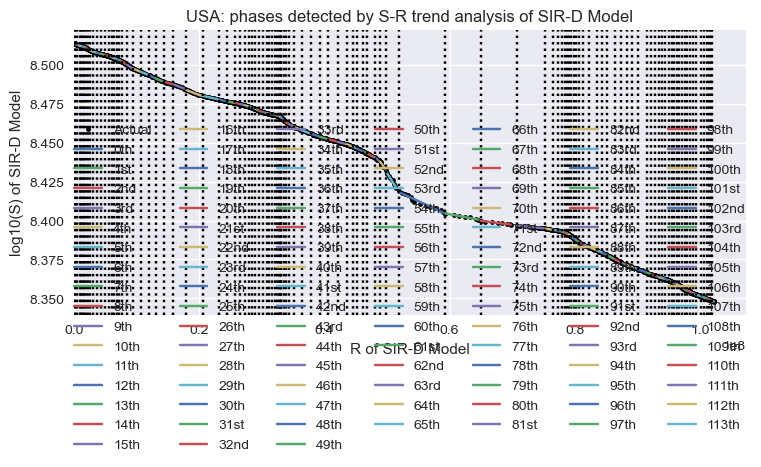

In [71]:
# Create subset of data for the country of interest and the dates of interest
# Complement does two things here: forces always increasing cumulative values, 
# estimates recovered cases using value of estimated recovery period of 10days
actual_df, _, _ = eng.subset(geo=country_ISO3, start_date='2020-02-15', end_date='2023-03-22', complement=True)

# Create a SIRF Model from actual df
dyn_act = cs.Dynamics.from_data(model=cs.SIRDModel, data=actual_df, name=country_ISO3)
dyn_act.register()

# # Breakdown of the SIRD Model Parameters and points of change
dyn_act.segment()

<Axes: ylabel='End'>

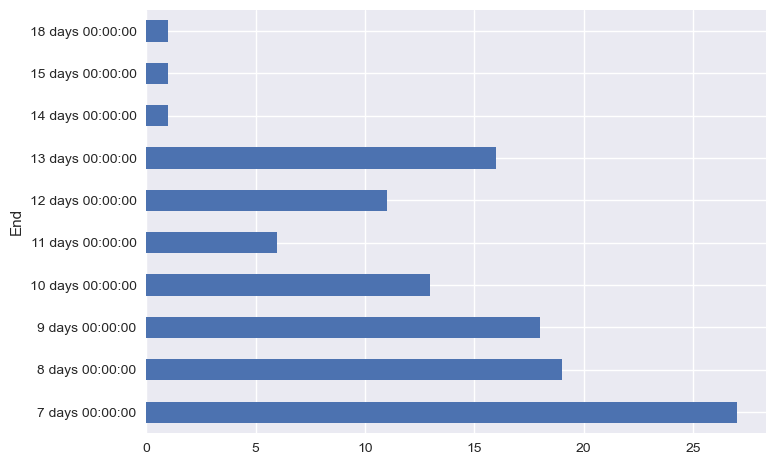

In [72]:
# Obtain a summary of the actual dynamics of the SIRF model
check = dyn_act.summary()

# Visualize the distribution of differences between start and end dates
check.diff()['End'].value_counts().sort_index().plot.barh()


In [73]:
# Estimate the tau value and disease parameters based on the actual SIRF data
dyn_act.estimate()

# Print the estimated tau value (time step) in minutes
print(f"Tau value [min]: {dyn_act.tau or 'un-set'}")

# Store the tau value in a variable
tau_time = dyn_act.tau

# Display the first rows of the dynamics summary
dynamics_df = dyn_act.summary()
dynamics_df.head()

  0%|          | 0/114 [00:00<?, ?it/s]

Tau value [min]: 60


,Start,End,Rt,kappa,rho,sigma,1/alpha2 [day],1/beta [day],1/gamma [day]
Phase,,,,,,,,,
0th,2020-02-15,2020-03-31,34.63,0.000153,0.008672,0.000098,273,5,427
1st,2020-04-01,2020-04-11,6.32,0.00023,0.00465,0.000506,181,9,82
2nd,2020-04-12,2020-04-25,1.12,0.000201,0.002542,0.002067,207,16,20
3rd,2020-04-26,2020-05-10,0.93,0.000164,0.002472,0.002497,254,17,17
4th,2020-05-11,2020-05-21,0.85,0.000147,0.002548,0.002841,284,16,15


In [74]:
# Display the adjusted values (normalized by tau and converted from minutes to days)
display(tau_time / dynamics_df.select_dtypes(include='float64') / 1440)

# Rename columns for clarity and set 'date' as the index, then drop unnecessary columns
dynamics_df = dynamics_df.rename(columns={
    'Start': 'date', 
    'Rt': 'derived_reproduction_rate', 
    'kappa': 'kap_mortality_rate', 
    'rho': 'rho_transmission_rate', 
    'sigma': 'sig_recovery_rate', 
    '1/alpha2 [day]': 't/k_mortality_period', 
    '1/beta [day]': 't/r_infection_period', 
    '1/gamma [day]': 't/s_recovery_period'
}).set_index('date').drop(columns=['End'])

,Rt,kappa,rho,sigma
Phase,,,,
0th,0.001203,272.784468,4.804715,426.561646
1st,0.006593,181.450292,8.959833,82.308258
2nd,0.037202,207.428834,16.388556,20.161123
3rd,0.044803,254.133808,16.856005,16.687784
4th,0.04902,284.312873,16.351923,14.665708
...,...,...,...,...
109th,0.063131,2478.039237,48.97859,32.617956
110th,0.024225,4286.114347,9.399527,16.21925
111th,0.02381,3439.125687,8.140346,14.303704


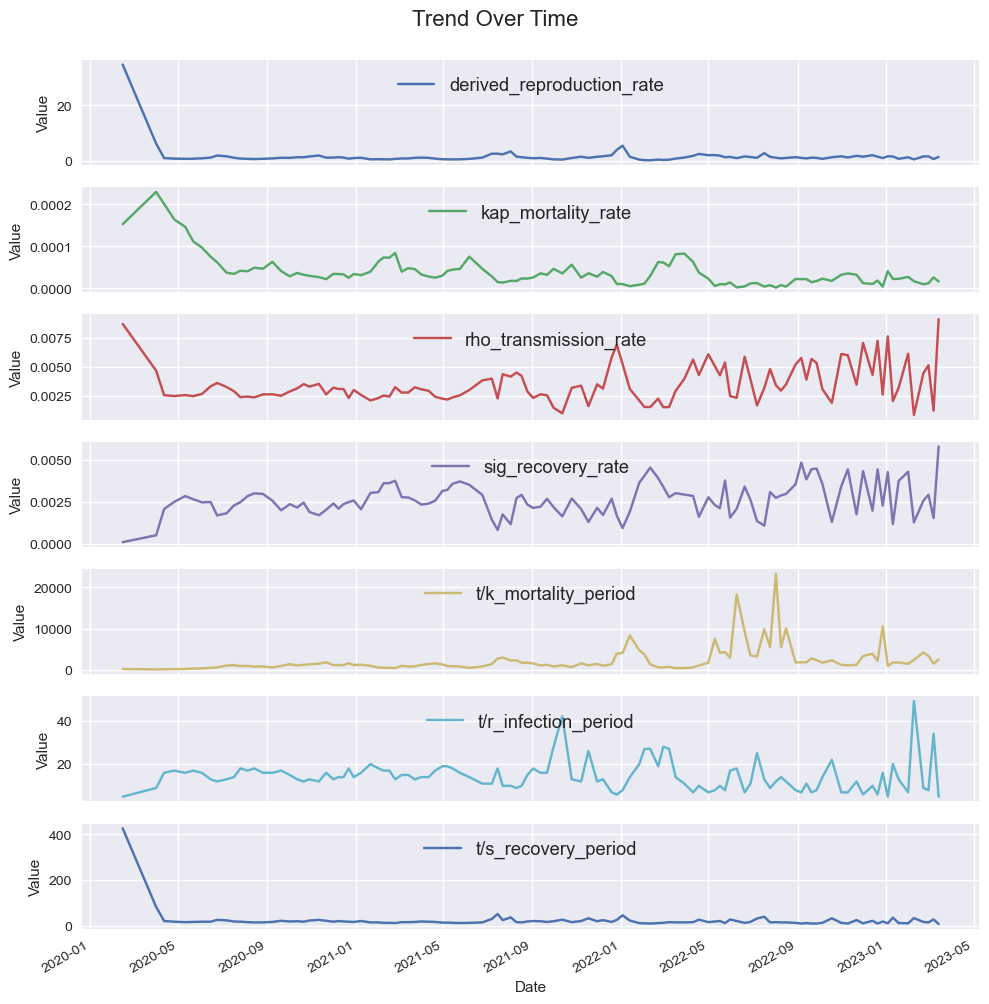

In [75]:
# Plot each column of the dynamics_df on separate subplots, and store the axis objects in axrr
axrr = dynamics_df.plot(subplots=True, figsize=(10, 10), grid=True)

# For each subplot (axis) in axrr
for ax in axrr:
    # Set the x-axis label as 'Date'
    ax.set_xlabel('Date')
    # Set the y-axis label as 'Value'
    ax.set_ylabel('Value')
    # Adjust the legend's position and font size for better visibility
    ax.legend(loc='upper center', fontsize='large')

# Set a main title for the entire plot and adjust its position for clarity
plt.suptitle('Trend Over Time', fontsize=16, y=1)

# Adjust the layout to prevent overlaps and provide padding between subplots
plt.tight_layout(pad=1.0)

# Display the plot
plt.show()


# <a id='toc4_'></a>[Data Loading](#toc0_)

In [76]:
#  CovSIRPHY Model
# disease_df = pd.merge(actual_df, dynamics_df, how='left', left_index=True, right_index=True)
# disease_df = disease_df.rename_axis('date')
# disease_df.to_parquet(f'{folder_holder}disease_df.parquet', engine='pyarrow')

disease_df = pd.read_parquet(f'{folder_holder}disease_df.parquet', engine='pyarrow')


# OWID Cov
owid_cov = pd.read_parquet('../Data/owid-covid-data.parquet', engine='pyarrow')
# Convert the 'date' column to datetime format
owid_cov['date'] = pd.to_datetime(owid_cov['date'])
# Set the 'date' column as the index of the DataFrame
owid_cov = owid_cov.set_index('date')


# # Load the mobility data from the CSV file
# mobility_df = pd.read_csv(f'{folder_holder}mobility.csv')
# mobility_df = clean_df(mobility_df, location_key)
# mobility_df.to_parquet(f'{folder_holder}mobility_df.parquet', engine='pyarrow')

mobility_df = pd.read_parquet(f'{folder_holder}mobility_df.parquet', engine='pyarrow')



# # Load the weather data from the CSV file
# weather_df = pd.read_csv(f'{folder_holder}weather.csv')
# weather_df = clean_df(weather_df, location_key)
# weather_df.to_parquet(f'{folder_holder}weather_df.parquet', engine='pyarrow')

weather_df = pd.read_parquet(f'{folder_holder}weather_df.parquet', engine='pyarrow')


# # Load the government response data from the CSV file
# gov_response_df = pd.read_csv(f'{folder_holder}oxford-government-response.csv')
# gov_response_df = clean_df(gov_response_df, location_key)
# gov_response_df.to_parquet(f'{folder_holder}gov_response_df.parquet', engine='pyarrow')

gov_response_df = pd.read_parquet(f'{folder_holder}gov_response_df.parquet', engine='pyarrow')


# # Load the hospitalizations data from the CSV file
# hospitalizations_df = pd.read_csv(f'{folder_holder}hospitalizations.csv')
# hospitalizations_df = clean_df(hospitalizations_df, location_key)
# hospitalizations_df.to_parquet(f'{folder_holder}hospitalizations.parquet', engine='pyarrow')

hospitalizations_df = pd.read_parquet(f'{folder_holder}hospitalizations.parquet', engine='pyarrow')


# Initialize a list containing all dataframes that need to be merged
time_series_dfs = [disease_df, owid_cov, mobility_df, gov_response_df, weather_df, hospitalizations_df]


# Merge all the dataframes in the list based on the 'date' column using the 'left' join method
# The 'reduce' function from 'functools' is used to iteratively apply the merge operation
master_df = reduce(lambda a, b: pd.merge(a, b, how='left', right_on='date', left_on='date', suffixes=['_owid', '_gov_respons']), time_series_dfs)


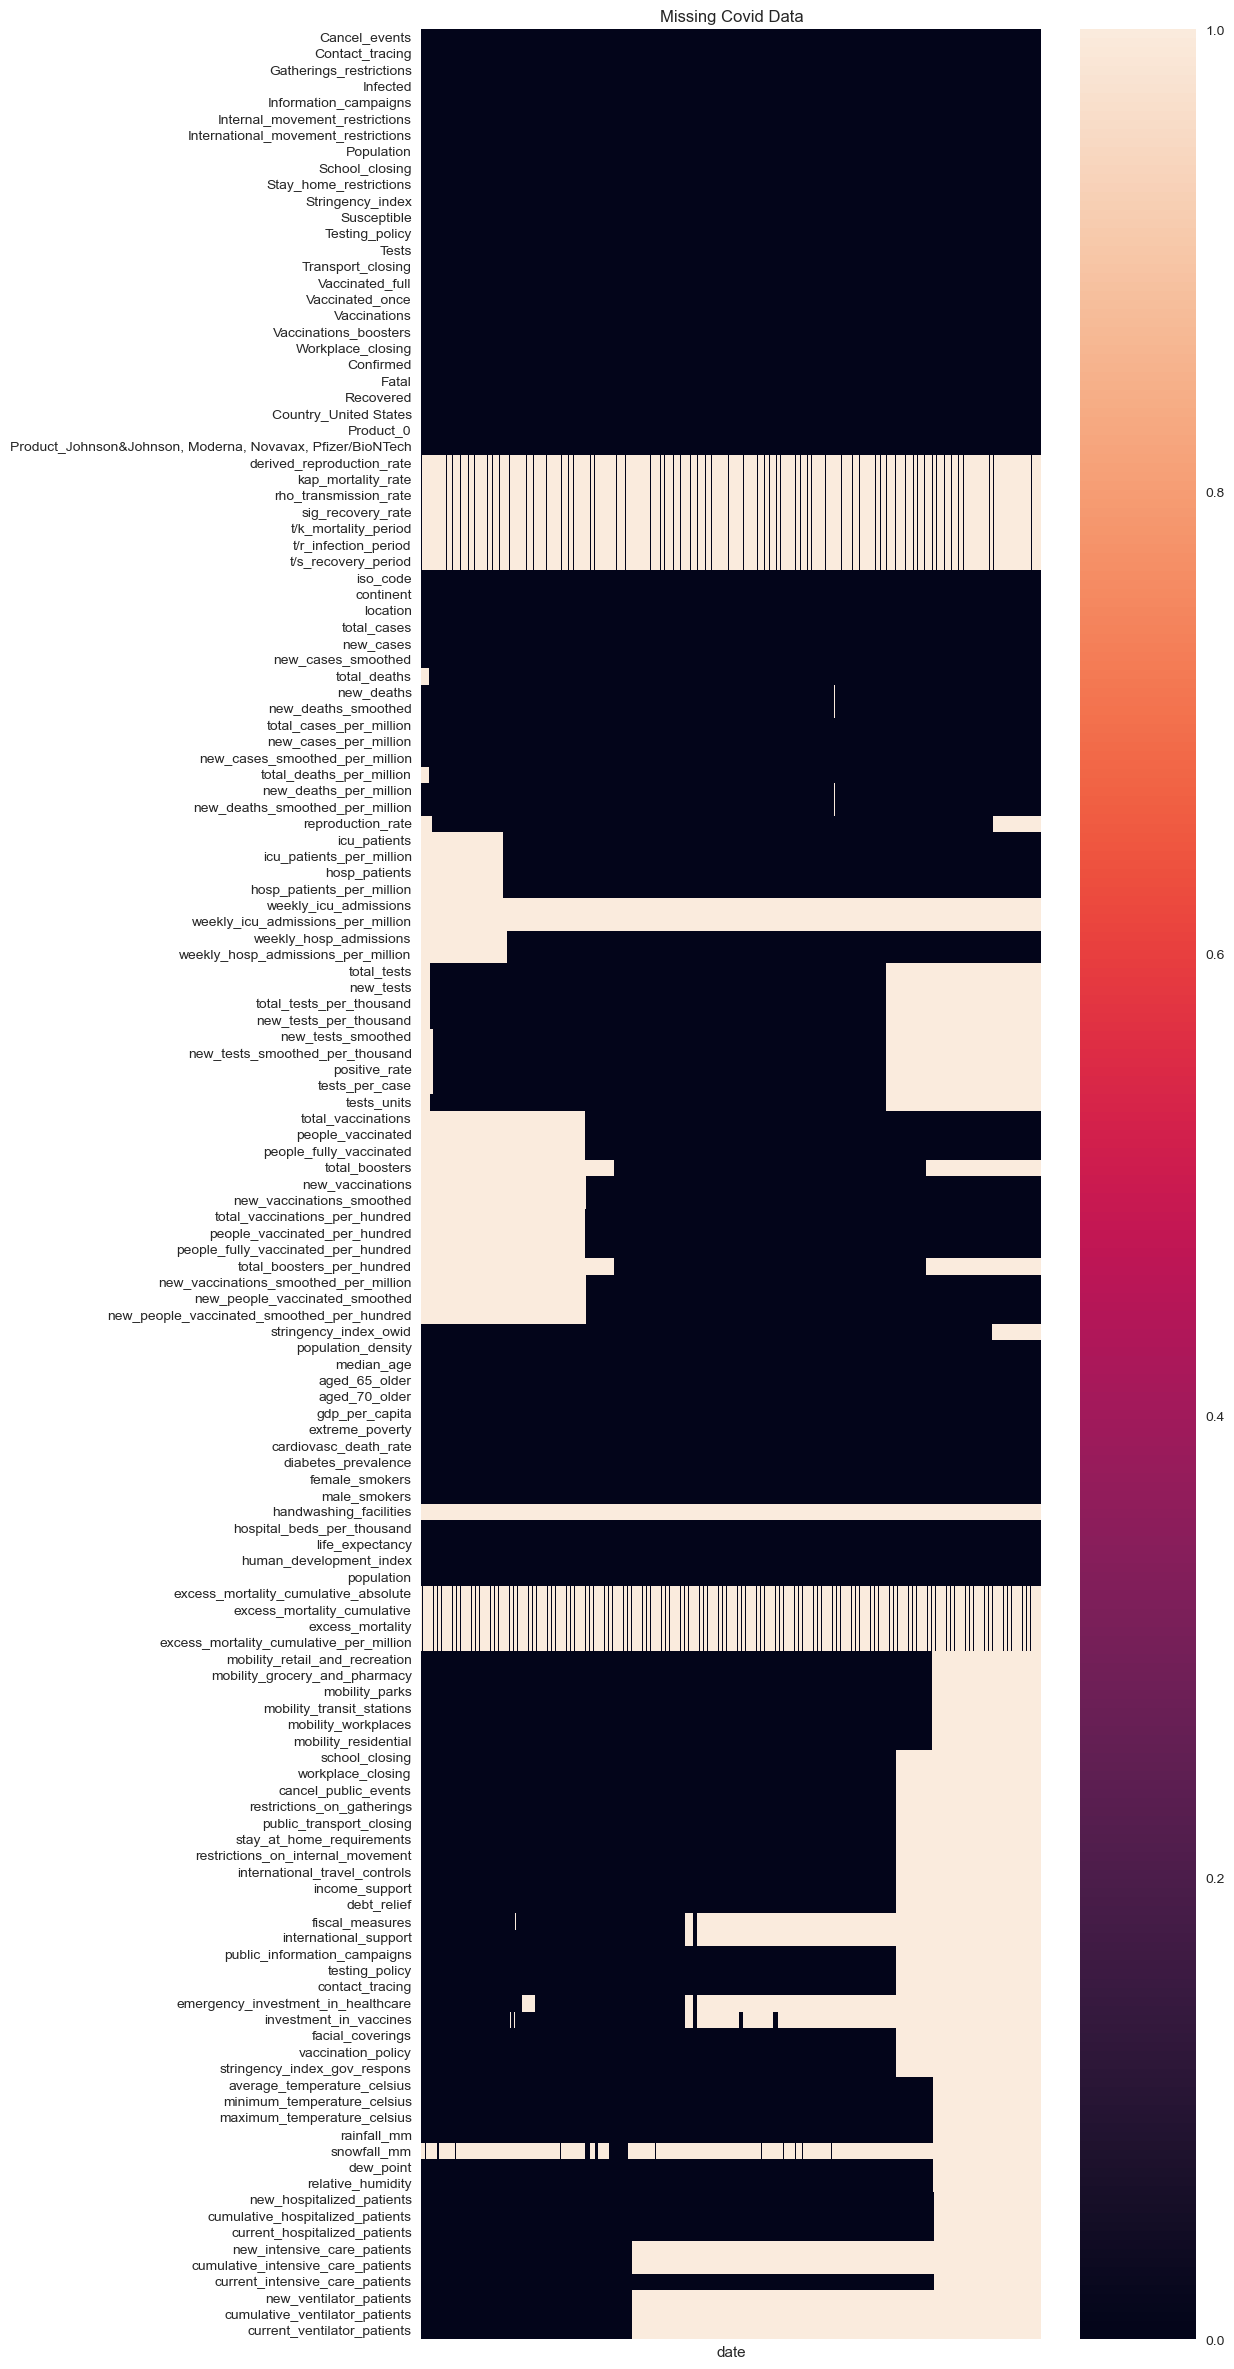

In [77]:
# Plot a heatmap to visualize the missing values (NaNs) in the merged dataframe
plt.figure(figsize=(10,30))  
sns.heatmap(master_df.isna().T, xticklabels = [], cbar=True) 
plt.title("Missing Covid Data") 
plt.show()  


I wanted to plot the holes in the time series to get an idea of what I needed to be cleaning. There is a lot of missing data here.

### <a id='toc4_1_1_'></a>[CovSIRPhy Dataset Cleaning](#toc0_)

Thanks to the Engineer Class in COVSirphy, the data has some issues like negative new cases already resolved. Howewver, the following steps will be taken: discard non-varying data, 

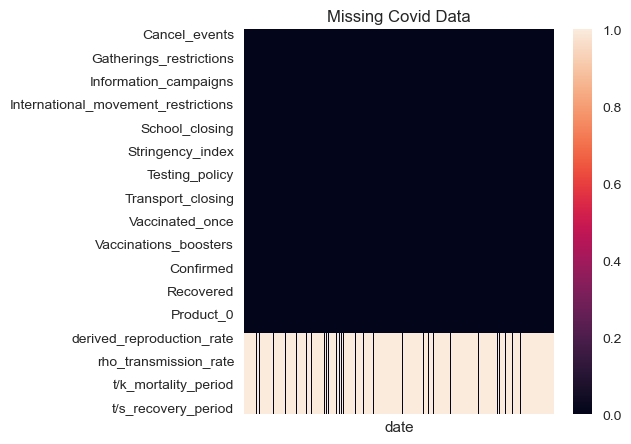

,mean,min,max,min_max_variance
Contact_tracing,1,1,1,0
Country_United States,1,1,1,0
Population,"326,687,501","326,687,501","326,687,501",0
derived_reproduction_rate,1.723,0.16,35.47,0.0089
t/s_recovery_period,21.3274,7,430,0.009
t/k_mortality_period,"2,608.4336",178,"31,155",0.0148
Infected,"1,529,243.3205",15,"13,384,650",0.0194
t/r_infection_period,14.2566,4,68,0.0199
Information_campaigns,1.9475,0,2,0.0256
kap_mortality_rate,0,0,0.0002,0.0265


,Cancel_events,Contact_tracing,Gatherings_restrictions,Infected,Information_campaigns,Internal_movement_restrictions,International_movement_restrictions,Population,School_closing,Stay_home_restrictions,...,Country_United States,Product_0,"Product_Johnson&Johnson, Moderna, Novavax, Pfizer/BioNTech",derived_reproduction_rate,kap_mortality_rate,rho_transmission_rate,sig_recovery_rate,t/k_mortality_period,t/r_infection_period,t/s_recovery_period
date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,0.0,1.0,0.0,15,0.0,0.0,3.0,326687501.0,0.0,0.0,...,1,1,0,35.47,0.000149,0.008729,0.000097,279,5,430
2020-02-16,0.0,1.0,0.0,15,0.0,0.0,3.0,326687501.0,0.0,0.0,...,1,1,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2020-02-17,0.0,1.0,0.0,25,0.0,0.0,3.0,326687501.0,0.0,0.0,...,1,1,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2020-02-18,0.0,1.0,0.0,25,0.0,0.0,3.0,326687501.0,0.0,0.0,...,1,1,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2020-02-19,0.0,1.0,0.0,25,0.0,0.0,3.0,326687501.0,0.0,0.0,...,1,1,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [78]:
# Set the figure size for the heatmap visualization
plt.figure(figsize=(5,5))

# Plot a heatmap to visualize the missing values (NaNs) in the 'disease_df' dataframe
# Transpose the data for better visualization and remove x-tick labels for clarity
sns.heatmap(disease_df.isna().T, xticklabels = [], cbar=True)

# Set the title of the heatmap
plt.title("Missing Covid Data")

# Display the heatmap
plt.show()

# Call the 'quick_summary' function to get a summary of the 'disease_df' dataframe for the top 15 rows
quick_summary(disease_df, 15)

# Display the first few rows of the 'disease_df' dataframe for a quick look
display(disease_df.head())


In [79]:
# Convert all column names to lowercase and replace spaces with underscores
disease_df.columns = [i.lower().replace(' ', '_') for i in disease_df.columns]

# Display the count of rows where 'confirmed' column values are greater than 'tests' column values
display(disease_df.loc[disease_df.confirmed > disease_df.tests, 'tests'].count())

# For rows where 'confirmed' column values are greater than 'tests' column values, set 'tests' column values equal to 'confirmed' column values
disease_df.loc[disease_df.confirmed > disease_df.tests, 'tests'] = disease_df.confirmed

# Display the count of rows where 'confirmed' column values are greater than 'tests' column values
display(disease_df.loc[disease_df.confirmed > disease_df.tests, 'tests'].count())


15

0

In [80]:
# Get rid of uninformative columns
disease_df.drop(columns=['product_0', 'product_johnson&johnson,_moderna,_novavax,_pfizer/biontech'], inplace=True)

display(disease_df.loc[:, disease_df.nunique() == 1].nunique())

disease_df = disease_df.loc[:, disease_df.nunique() > 1]

display(disease_df.nunique())


contact_tracing          1
population               1
country_united_states    1
dtype: int64

cancel_events                             3
gatherings_restrictions                   5
infected                               1136
information_campaigns                     2
internal_movement_restrictions            4
international_movement_restrictions       2
school_closing                            3
stay_home_restrictions                    4
stringency_index                         31
susceptible                            1124
testing_policy                            3
tests                                   849
transport_closing                         4
vaccinated_full                         841
vaccinated_once                         841
vaccinations                            841
vaccinations_boosters                   539
workplace_closing                         4
confirmed                              1124
fatal                                  1105
recovered                              1118
derived_reproduction_rate                90
kap_mortality_rate              

In [81]:
# Identify columns in 'disease_df' where the minimum value is negative
restrictions = disease_df.min()[disease_df.min() < 0]

# Take the absolute value of the data in the identified columns to make all values non-negative
disease_df.loc[:, restrictions.index] = disease_df.loc[:, restrictions.index].abs()

# Display the changed column names
restrictions.index

Index(['cancel_events', 'gatherings_restrictions',
       'internal_movement_restrictions', 'school_closing',
       'stay_home_restrictions', 'transport_closing', 'workplace_closing'],
      dtype='object')

In [82]:
# Define the non-dimensional parameters present in the dataset
non_dim_parameters = ['kap_mortality_rate', 'rho_transmission_rate', 'sig_recovery_rate'] 

# Define the dimensional parameters which are derived from the non-dimensional parameters
dimensional_parameters = ['t/k_mortality_period', 't/r_infection_period', 't/s_recovery_period']

# Update the list of parameters to include non-dimensional, dimensional, and the reproduction rate
parameters = non_dim_parameters + dimensional_parameters + ['derived_reproduction_rate']


for col in non_dim_parameters:
    try:
        disease_df[col] = disease_df[col].astype(float)
    except ValueError as e:
        print(f"Error converting column {col}: {e}")

disease_df.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1142 entries, 2020-02-15 to 2023-04-01
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   cancel_events                        1142 non-null   Float64
 1   gatherings_restrictions              1142 non-null   Float64
 2   infected                             1142 non-null   Int64  
 3   information_campaigns                1142 non-null   Float64
 4   internal_movement_restrictions       1142 non-null   Float64
 5   international_movement_restrictions  1142 non-null   Float64
 6   school_closing                       1142 non-null   Float64
 7   stay_home_restrictions               1142 non-null   Float64
 8   stringency_index                     1142 non-null   Float64
 9   susceptible                          1142 non-null   Float64
 10  testing_policy                       1142 non-null   Float64
 11  tests       

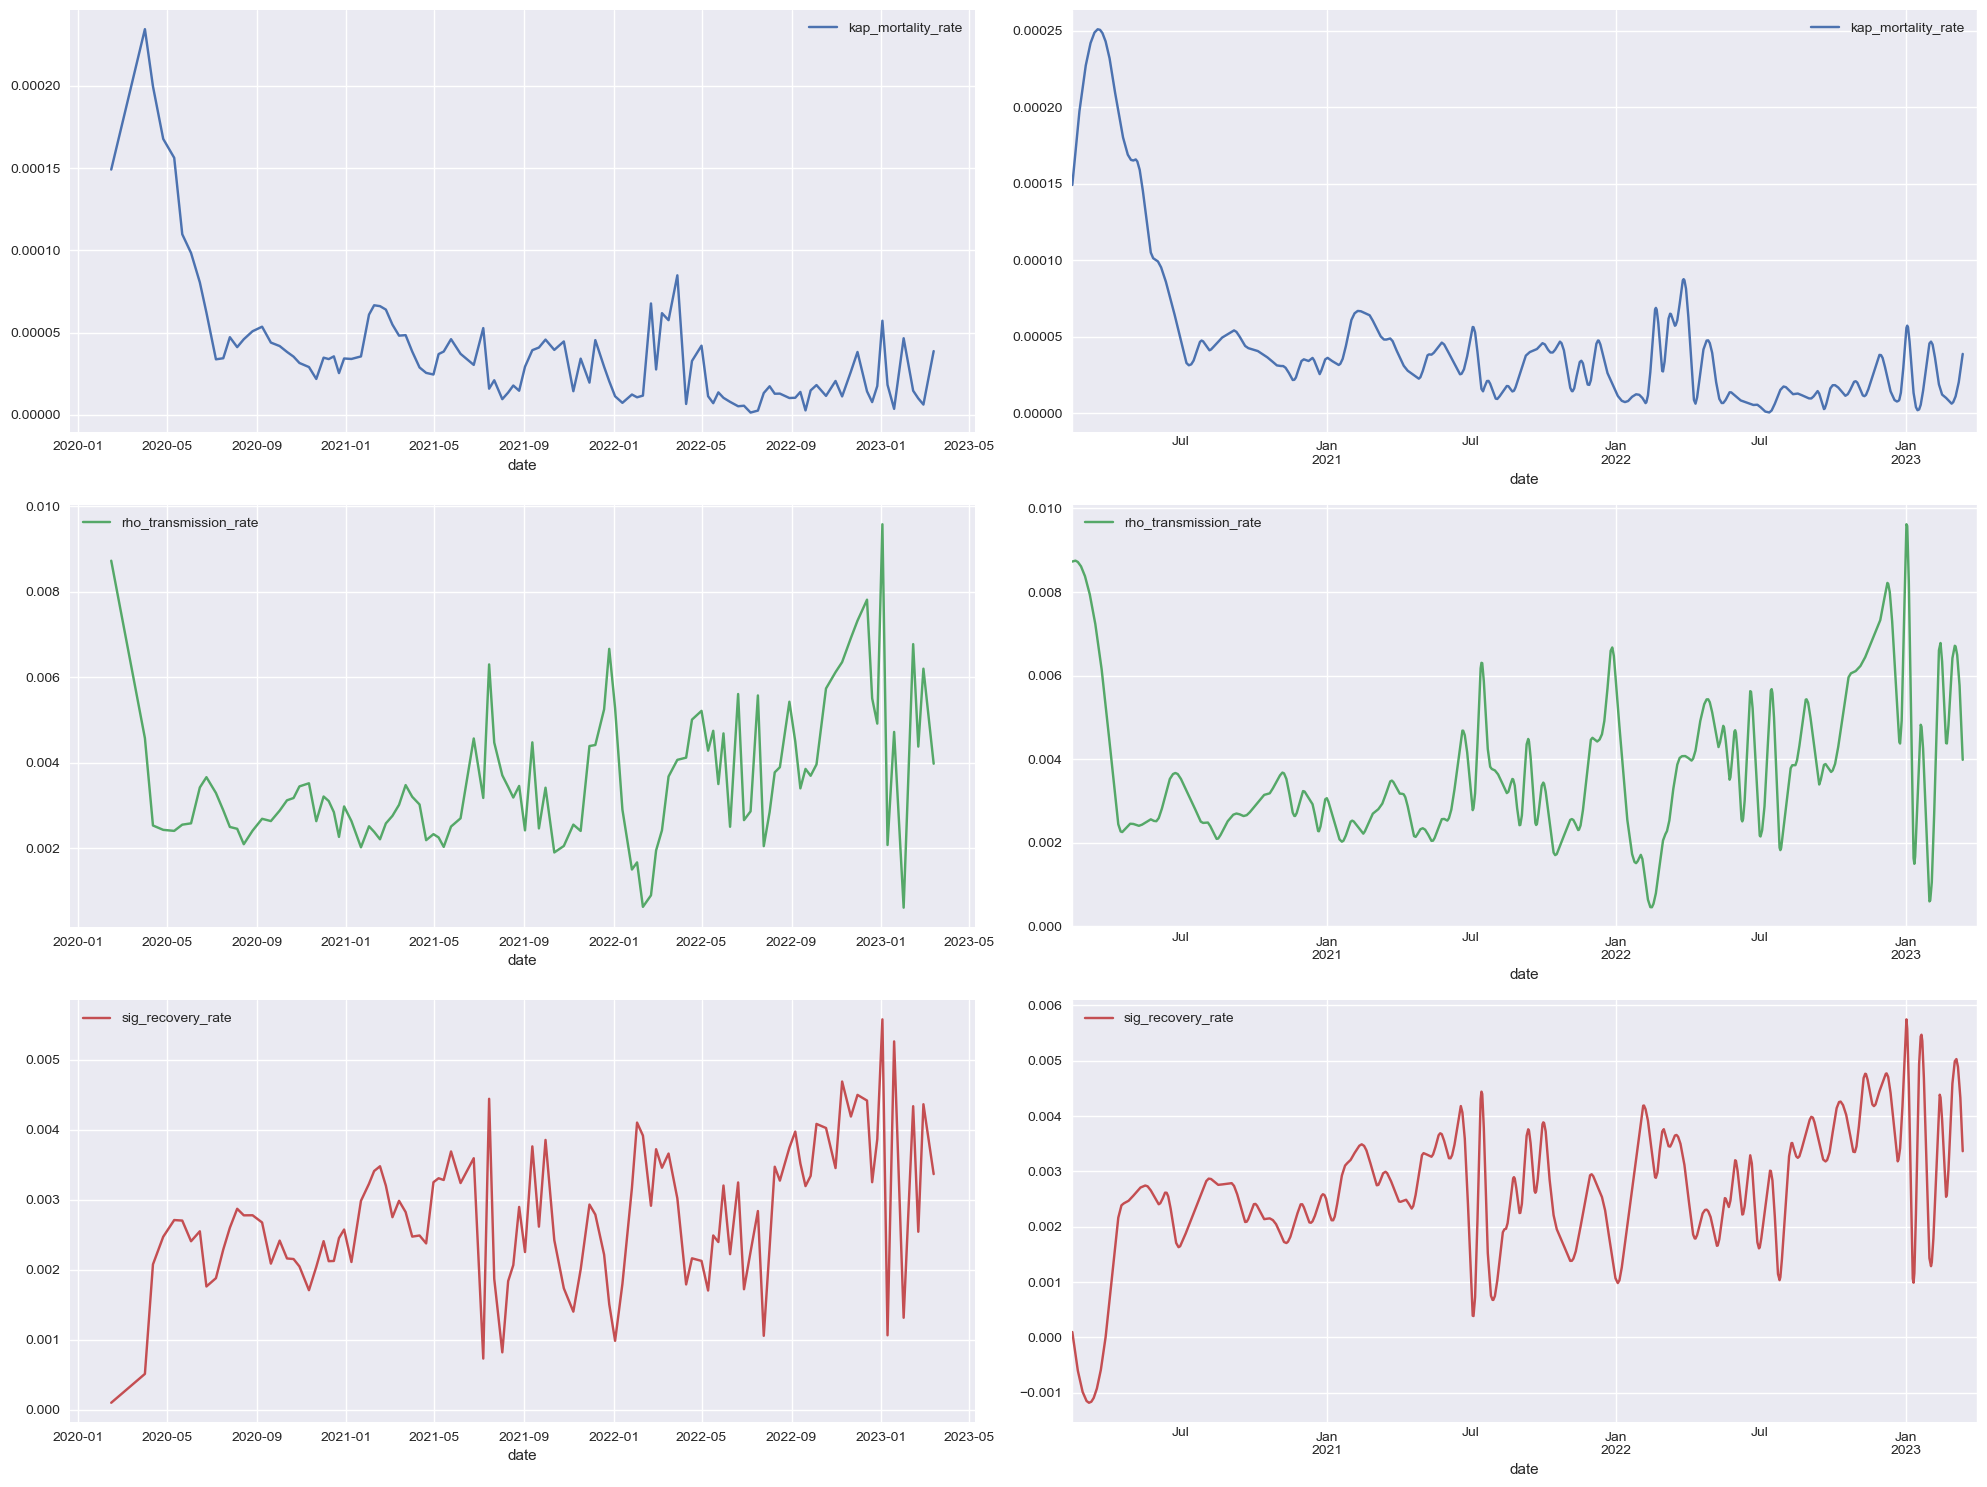

In [83]:
method = 'polynomial'
order = 2

# Create a figure with two columns for subplots
fig, axes = plt.subplots(nrows=len(non_dim_parameters), ncols=2, figsize=(20, 15))

# Plot original data in the left column (axes[:, 0])
disease_df[non_dim_parameters].dropna().plot(subplots=True, ax=axes[:, 0], grid=True)

# Plot interpolated data in the right column (axes[:, 1])
disease_df[non_dim_parameters].interpolate(method=method, order=order).plot(subplots=True, ax=axes[:, 1], grid=True)

# plt.plot()
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
min_holder = disease_df[non_dim_parameters].min().copy()

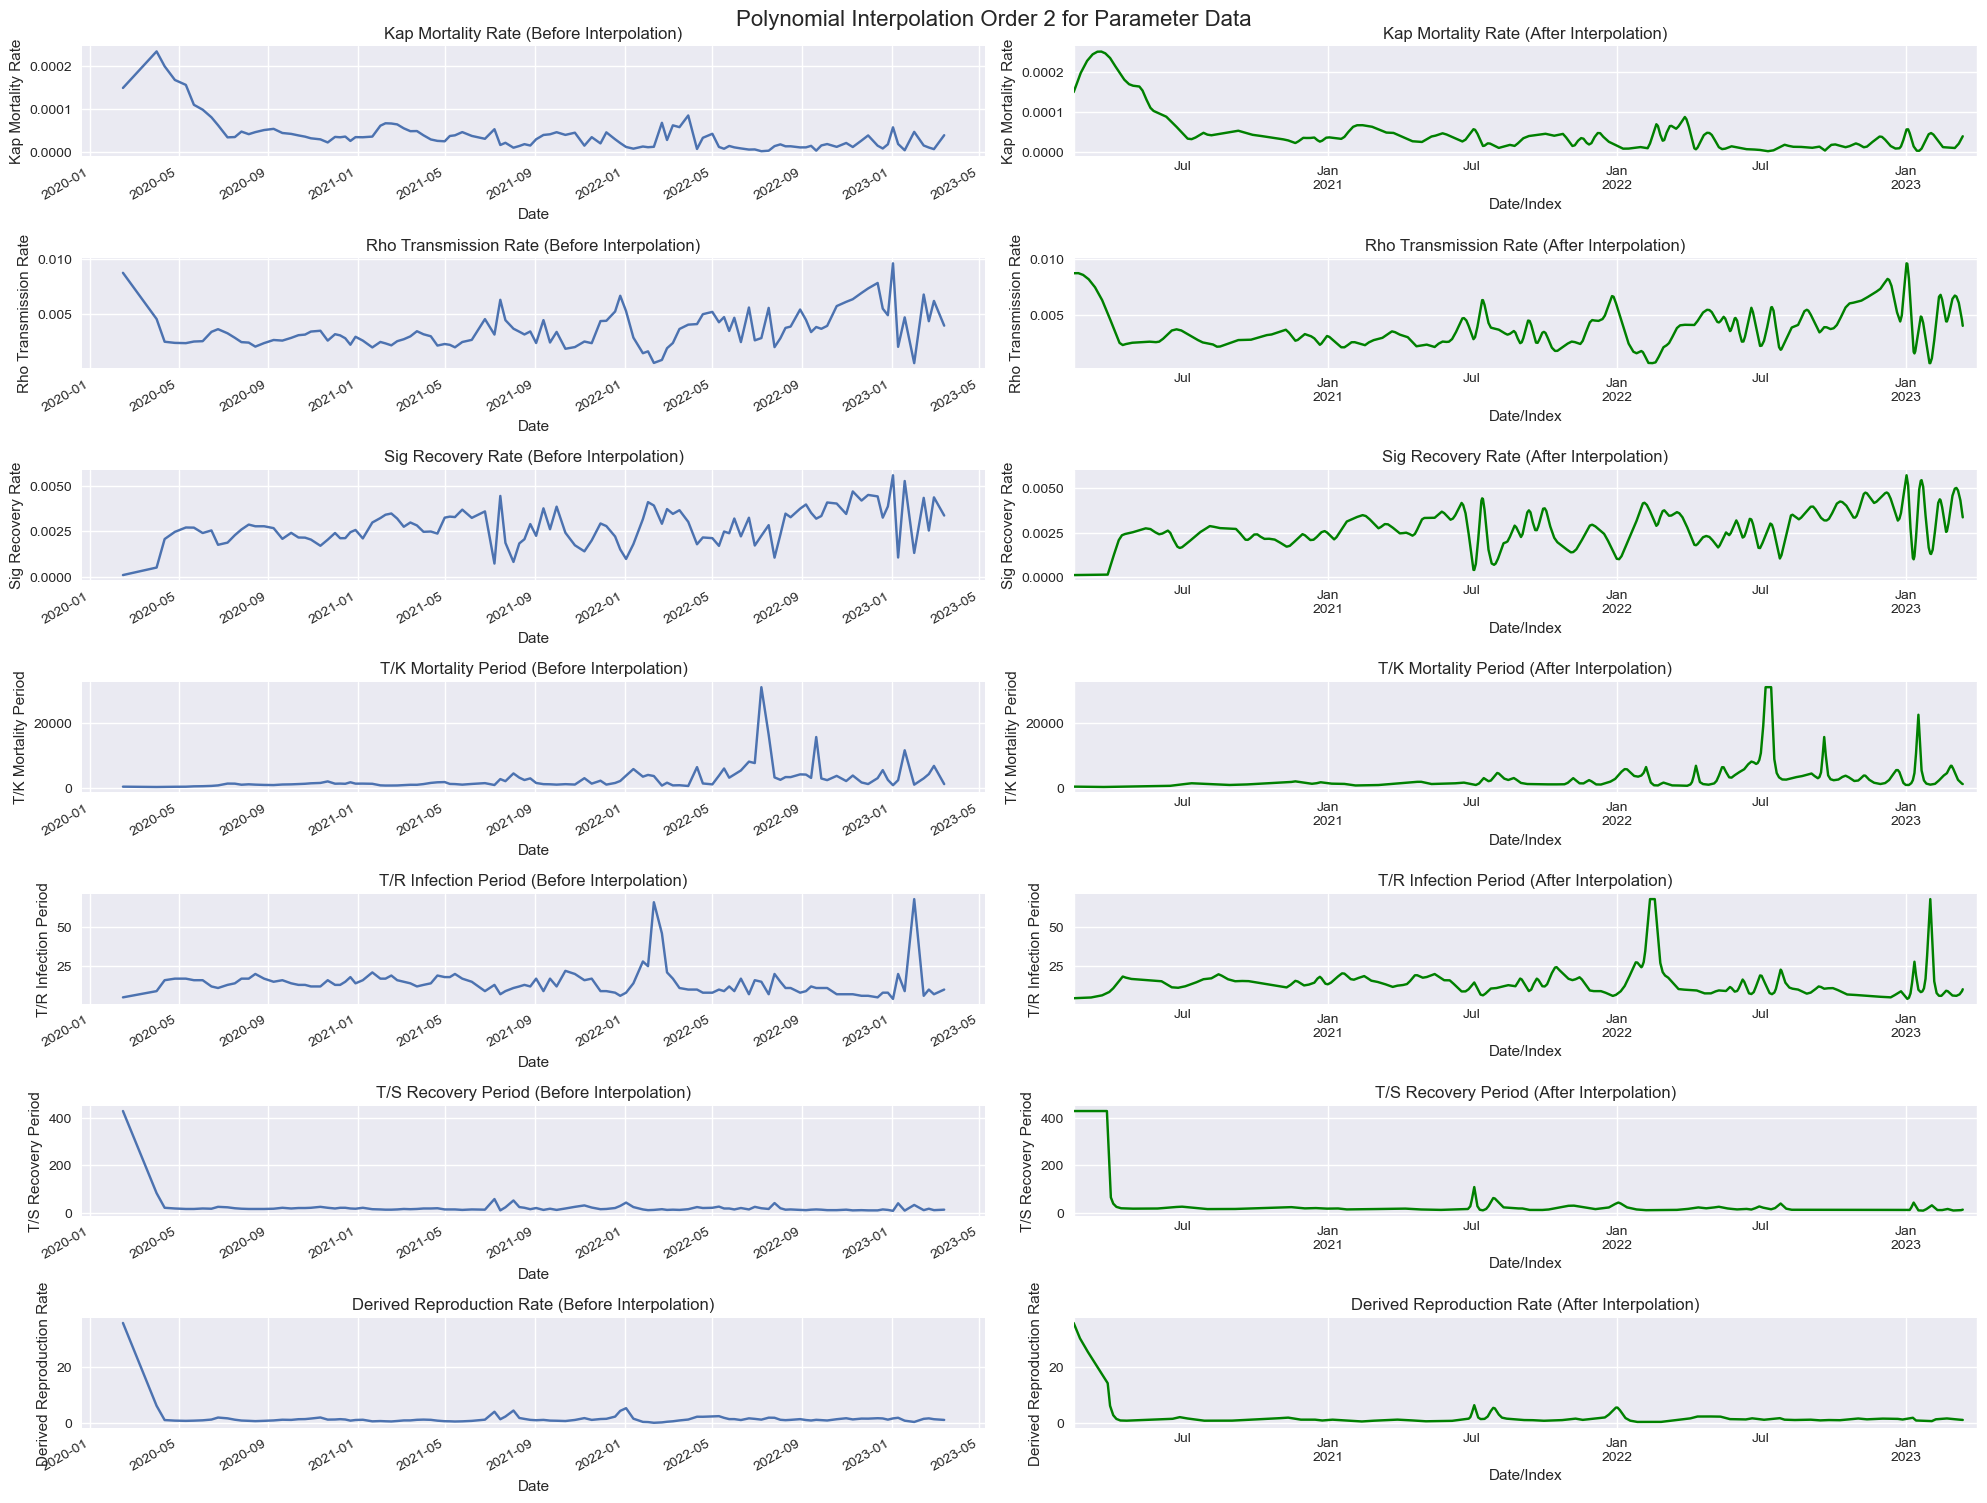

In [84]:
# Plot the original parameters in the dataframe using subplots
fig, axes = plt.subplots(nrows=len(parameters), ncols=2, figsize=(20, 15))
# Plotting original data
for idx, col in enumerate(parameters):
    disease_df[col].dropna().plot(ax=axes[idx, 0], grid=True)
    axes[idx, 0].set_title(col.replace('_', ' ').title() + ' (Before Interpolation)')
    axes[idx, 0].set_xlabel('Date')  # Assuming the x-axis represents dates or index values
    axes[idx, 0].set_ylabel(col.replace('_', ' ').title())

# Interpolate and process the data
disease_df[non_dim_parameters] = disease_df[non_dim_parameters].interpolate(method=method, order=order)
disease_df[non_dim_parameters] = np.where(disease_df[non_dim_parameters] < min_holder, min_holder, disease_df[non_dim_parameters])
disease_df[dimensional_parameters] = tau_time / disease_df[non_dim_parameters] / 1440
disease_df['derived_reproduction_rate'] = disease_df['rho_transmission_rate'] / (disease_df['sig_recovery_rate'] + disease_df['kap_mortality_rate'])

# Plotting interpolated and processed data
for idx, col in enumerate(parameters):
    disease_df[col].plot(ax=axes[idx, 1], grid=True, color='green')
    axes[idx, 1].set_title(col.replace('_', ' ').title() + ' (After Interpolation)')
    axes[idx, 1].set_xlabel('Date/Index')  # Assuming the x-axis represents dates or index values
    axes[idx, 1].set_ylabel(col.replace('_', ' ').title())

# Adjusts the layout for better visualization
plt.tight_layout() 
plt.suptitle('Polynomial Interpolation Order 2 for Parameter Data', fontsize=16, y=1) 
plt.show()


,susceptible,confirmed,fatal,recovered,infected
date,,,,,
2023-03-28,222777467.0,103910034,1135343,102405210,369481
2023-03-29,222777467.0,103910034,1135343,102406215,368476
2023-03-30,222777467.0,103910034,1135343,102419227,355464
2023-03-31,222777467.0,103910034,1135343,102439162,335529
2023-04-01,222777467.0,103910034,1135343,102576079,198612


<Axes: xlabel='date'>

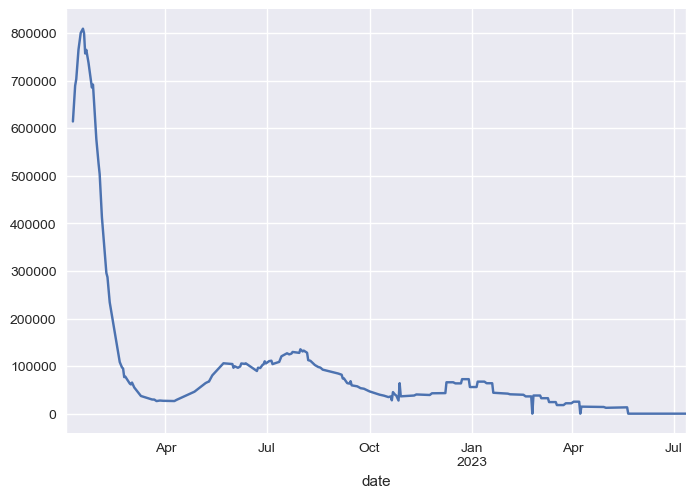

In [85]:
# Define a list of column names to be used for data analysis
variables = ['susceptible', 'confirmed', 'fatal', 'recovered', 'infected']

# Display the last 5 rows of the specified columns from the 'disease_df' dataframe
display(disease_df[variables].tail(5))

# Filter the 'owid_cov' dataframe to only include rows with dates after '2022-01-01'
# Then, calculate the 7-day rolling average of the 'new_cases' column and plot the results
owid_cov[owid_cov.index > '2022-01-01'].new_cases.rolling(7).mean().plot()


#### Transformation Issues
Potentially Losing Some data by keeping it at the minimum value of the original dataset. Consider linear interpolation instead or other always positive transformation.

In [86]:
# Display the rows in 'disease_df' where 'parameters' columns have missing values
display(disease_df[parameters][disease_df[parameters].isna()])

# Fill missing values in 'parameters' columns using backfill and forward fill
disease_df[parameters] = disease_df[parameters].fillna(method='bfill').fillna(method='ffill')

# Count the number of missing values in 'parameters' columns
disease_df[parameters].isna().sum()


,kap_mortality_rate,rho_transmission_rate,sig_recovery_rate,t/k_mortality_period,t/r_infection_period,t/s_recovery_period,derived_reproduction_rate
date,,,,,,,
2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


kap_mortality_rate           0
rho_transmission_rate        0
sig_recovery_rate            0
t/k_mortality_period         0
t/r_infection_period         0
t/s_recovery_period          0
derived_reproduction_rate    0
dtype: int64

### <a id='toc4_1_2_'></a>[Owid Dataset](#toc0_)

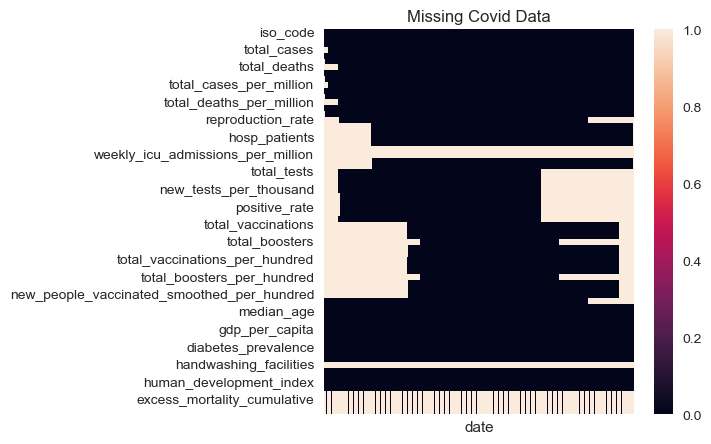

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1287 entries, 2020-01-03 to 2023-07-12
Data columns (total 66 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    1287 non-null   object 
 1   continent                                   1287 non-null   object 
 2   location                                    1287 non-null   object 
 3   total_cases                                 1270 non-null   float64
 4   new_cases                                   1287 non-null   float64
 5   new_cases_smoothed                          1282 non-null   float64
 6   total_deaths                                1230 non-null   float64
 7   new_deaths                                  1286 non-null   float64
 8   new_deaths_smoothed                         1281 non-null   float64
 9   total_cases_per_million                     1270 non-null   float64

<Axes: >

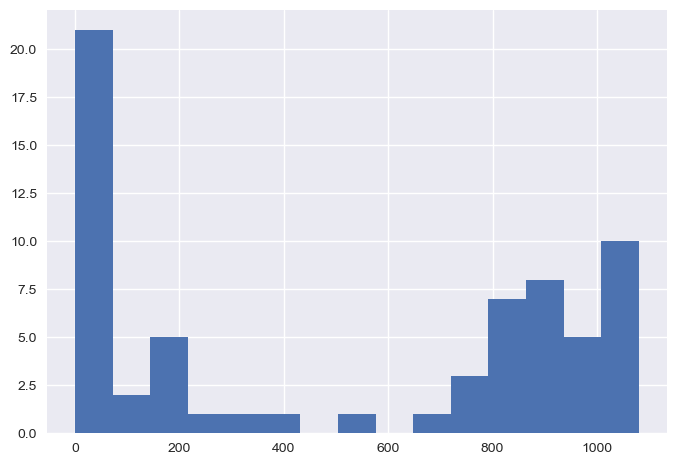

In [87]:
# Plot missing values in owid
plt.figure(figsize=(5,5))
sns.heatmap(owid_cov.isna().T,xticklabels = [], cbar=True)
plt.title("Missing Covid Data")
plt.show()

# Display information about the DataFrame 'owid_cov'
owid_cov.info()

# Create a histogram of the number of unique values in each column of 'owid_cov'
owid_cov.nunique().hist(bins=15)


In [88]:
owid_cov.nunique().sort_values().head(25)

weekly_icu_admissions                  0
handwashing_facilities                 0
weekly_icu_admissions_per_million      0
population_density                     1
median_age                             1
aged_65_older                          1
aged_70_older                          1
gdp_per_capita                         1
extreme_poverty                        1
iso_code                               1
female_smokers                         1
male_smokers                           1
hospital_beds_per_thousand             1
life_expectancy                        1
human_development_index                1
population                             1
cardiovasc_death_rate                  1
diabetes_prevalence                    1
tests_units                            1
continent                              1
location                               1
reproduction_rate                    132
tests_per_case                       143
excess_mortality_cumulative          161
excess_mortality

In [89]:

# Select columns in 'owid_cov' that have more than 10 unique values
owid_cov = owid_cov.loc[:, owid_cov.nunique() > 10]

# Drop specified columns from 'owid_cov'

owid_cov.drop(columns=['total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed',
            'new_tests_smoothed_per_thousand', 'new_cases_smoothed', 'new_deaths_smoothed',
            'excess_mortality_cumulative_per_million', 'total_boosters_per_hundred', 
            'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',	'people_vaccinated_per_hundred',	
            'people_fully_vaccinated_per_hundred',	'new_vaccinations_smoothed_per_million',	
            'new_people_vaccinated_smoothed',	'new_people_vaccinated_smoothed_per_hundred',
            'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 
            'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'new_deaths_smoothed', 'weekly_hosp_admissions', 
            'icu_patients_per_million', 'hosp_patients_per_million', 'weekly_hosp_admissions_per_million'], inplace=True)


In [90]:

# Perform aggregation and styling on 'owid_cov', and display the result
display(
        last_first_missing(owid_cov, True).style
                .background_gradient(cmap='coolwarm', subset=['percent', 'min_max_variance'])
                .format(lambda x: "{:,.4f}".format(x).rstrip('0').rstrip('.') if isinstance(x, (float, int)) else x)
        )


,First_Data_Date,Last_Data_Date,percent,min_max_variance,min,max,mean
excess_mortality,2020-01-05,2023-05-21,86.2471,0.058,-4.2,46.02,12.6522
excess_mortality_cumulative,2020-01-05,2023-05-21,86.2471,0.0564,-4.2,17.51,12.9871
excess_mortality_cumulative_absolute,2020-01-05,2023-05-21,86.2471,0.1172,"-13,646.999","1,276,845","740,688.7045"
total_boosters,2021-02-04,2022-09-01,55.3225,0.1605,1,"133,062,763","53,957,174.5617"
positive_rate,2020-03-07,2022-06-18,35.1981,0.0382,0.017,0.292,0.0853
tests_per_case,2020-03-07,2022-06-18,35.1981,0.0403,3.4,58.8,16.7765
total_tests,2020-03-01,2022-06-18,34.7319,0.106,348,"912,769,124","410,386,446.7012"
new_tests,2020-03-01,2022-06-18,34.7319,0.0348,348,"3,201,706","1,086,629.9095"
new_vaccinations,2020-12-14,2023-05-09,31.857,0.0339,"2,556","4,581,777","771,588.5542"
total_vaccinations,2020-12-13,2023-05-09,31.7793,0.0879,"45,620","676,728,782","471,846,074.5718"


In [91]:
# Display the first five rows of specific columns in 'owid_cov' DataFrame
owid_cov[['excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_absolute']].head(5)


,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_absolute
date,,,
2020-01-03,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN
2020-01-05,-4.2,-4.2,-2640.0
2020-01-06,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN


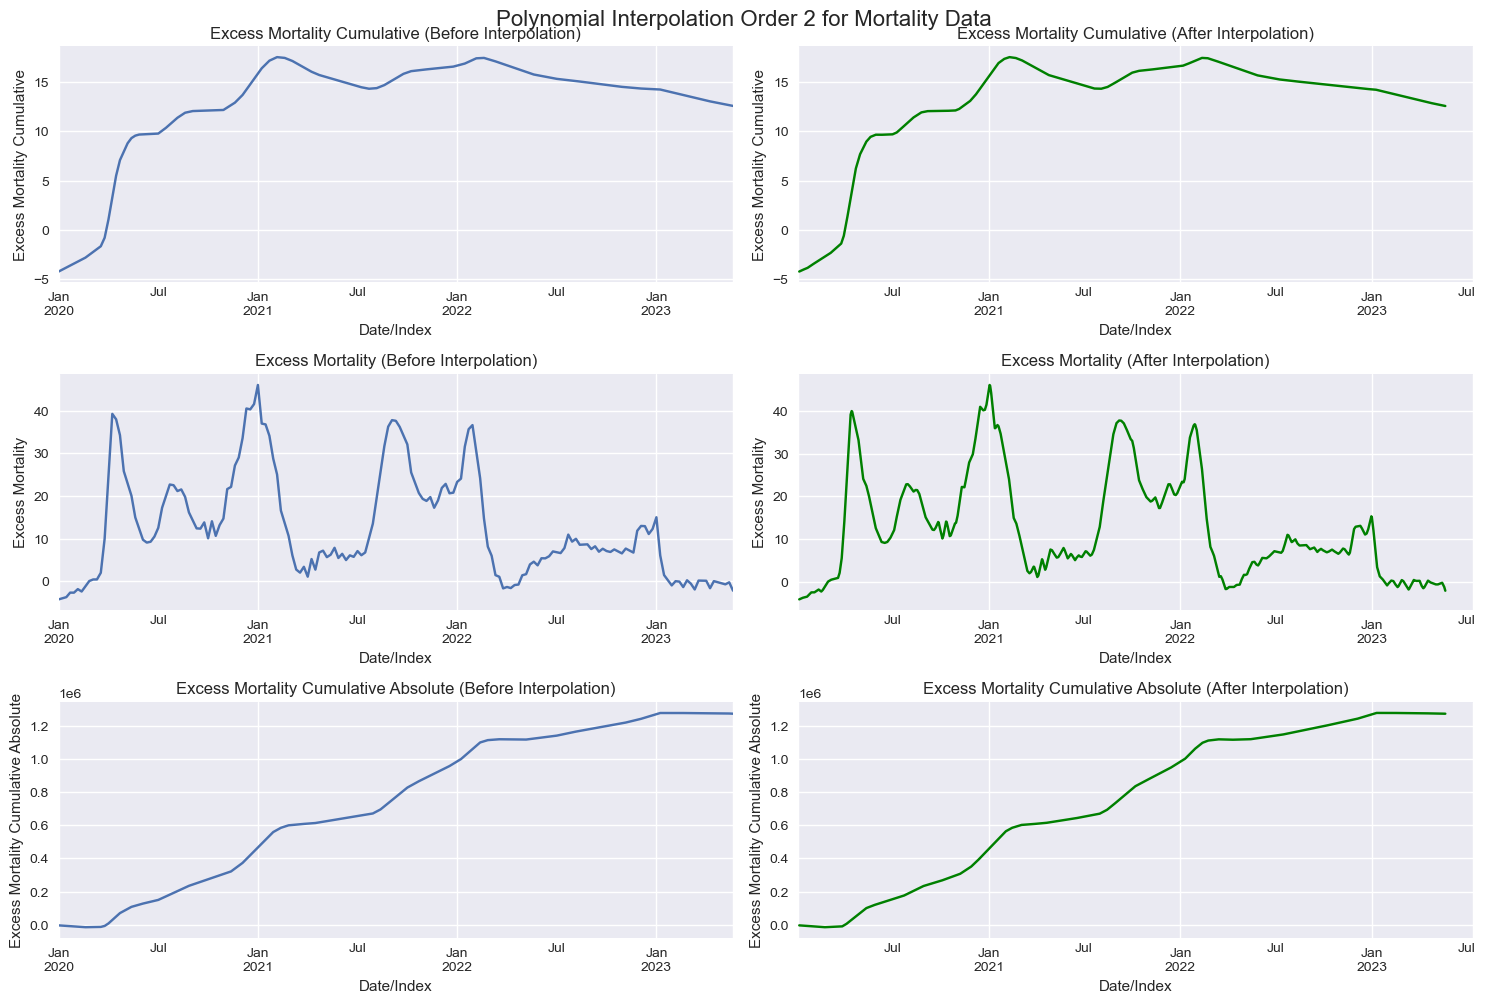

In [92]:
import matplotlib.pyplot as plt

# Define a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Names of the columns to be plotted
columns = ['excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_absolute']

# Plotting the data before interpolation
for idx, col in enumerate(columns):
    owid_cov[col].dropna().plot(ax=axes[idx, 0], grid=True)
    axes[idx, 0].set_title(col.replace('_', ' ').title()  + ' (Before Interpolation)')
    axes[idx, 0].set_xlabel('Date/Index')  # Assuming the x-axis represents dates or index values
    axes[idx, 0].set_ylabel(col.replace('_', ' ').title() )

# Interpolate the columns
owid_cov['excess_mortality_cumulative'] = owid_cov['excess_mortality_cumulative'].interpolate(order=2, method='polynomial', limit_area='inside')
owid_cov['excess_mortality'] = owid_cov['excess_mortality'].interpolate(order=2, method='polynomial', limit_area='inside')
owid_cov['excess_mortality_cumulative_absolute'] = owid_cov['excess_mortality_cumulative_absolute'].interpolate(order=2, method='polynomial', limit_area='inside')

# Plotting the data after interpolation
for idx, col in enumerate(columns):
    owid_cov[col].plot(ax=axes[idx, 1], grid=True, color='green')
    axes[idx, 1].set_title(col.replace('_', ' ').title()  + ' (After Interpolation)')
    axes[idx, 1].set_xlabel('Date/Index')  # Assuming the x-axis represents dates or index values
    axes[idx, 1].set_ylabel(col.replace('_', ' ').title() )

# Adjust layout for better presentation
plt.tight_layout()
plt.suptitle('Polynomial Interpolation Order 2 for Mortality Data', fontsize=16, y=1) 
plt.show()


In [93]:
# Display the rows in 'disease_df' where 'parameters' columns have missing values
display(owid_cov[['excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_absolute']]
        [owid_cov['excess_mortality_cumulative'].isna()].head())

# # If there are still NaN values at the beginning or end, you can use ffill or bfill to handle them
owid_cov[['excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_absolute']] = \
    owid_cov[['excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_absolute']].fillna(method='bfill').fillna(method='ffill')

# Count the number of missing values in 'parameters' columns
owid_cov[['excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_absolute']].isna().sum()


,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_absolute
date,,,
2020-01-03,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN
2023-05-22,NaN,NaN,NaN
2023-05-23,NaN,NaN,NaN
2023-05-24,NaN,NaN,NaN


excess_mortality_cumulative             0
excess_mortality                        0
excess_mortality_cumulative_absolute    0
dtype: int64

## <a id='toc4_2_'></a>[Google Datasets Loading and Cleaning](#toc0_)

### <a id='toc4_2_1_'></a>[Mobility Data](#toc0_)

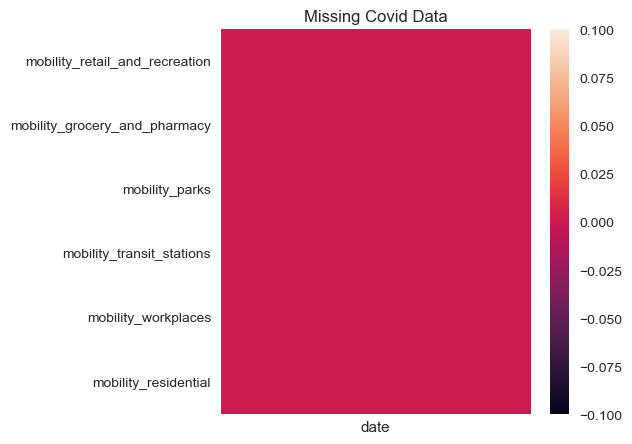

(mobility_retail_and_recreation    0
 mobility_grocery_and_pharmacy     0
 mobility_parks                    0
 mobility_transit_stations         0
 mobility_workplaces               0
 mobility_residential              0
 dtype: int64,
 mobility_retail_and_recreation     68
 mobility_grocery_and_pharmacy      54
 mobility_parks                    116
 mobility_transit_stations          64
 mobility_workplaces                70
 mobility_residential               28
 dtype: int64)

In [94]:
# looking at nulls and unique values
plt.figure(figsize=(5,5))
sns.heatmap(mobility_df.isna().T,xticklabels = [], cbar=True)
plt.title("Missing Covid Data")
plt.show()

mobility_df.isna().sum(), mobility_df.nunique()

In [95]:
# short preview of the data

display(
        last_first_missing(mobility_df, True).sort_values(by='min_max_variance')
                .style.background_gradient(cmap='coolwarm', subset='min_max_variance', vmin=0, vmax=.1)
                .format(lambda x: "{:,.4f}".format(x).rstrip('0').rstrip('.') if isinstance(x, (float, int)) else x)
        )


,First_Data_Date,Last_Data_Date,percent,min_max_variance,min,max,mean
mobility_grocery_and_pharmacy,2020-02-15,2022-09-12,0,0.006,-61,36,-2.5303
mobility_retail_and_recreation,2020-02-15,2022-09-12,0,0.0128,-82,14,-12.6355
mobility_workplaces,2020-02-15,2022-09-12,0,0.0213,-84,5,-25.9224
mobility_transit_stations,2020-02-15,2022-09-12,0,0.0223,-67,7,-25.8183
mobility_parks,2020-02-15,2022-09-12,0,0.0282,-38,127,20.5887
mobility_residential,2020-02-15,2022-09-12,0,0.0283,-2,27,6.9001


### <a id='toc4_2_2_'></a>[Weather Data](#toc0_)

average_temperature_celsius      0
minimum_temperature_celsius      0
maximum_temperature_celsius      0
rainfall_mm                      0
snowfall_mm                    882
dew_point                        0
relative_humidity                0
dtype: int64

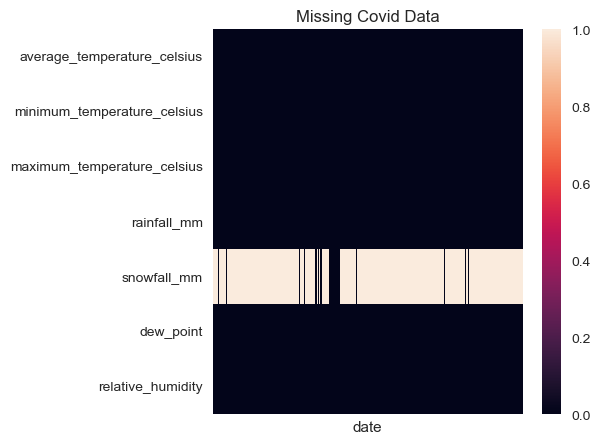

In [96]:
# Display the count of missing values in each column of 'weather_df'
display(weather_df.isna().sum())

plt.figure(figsize=(5,5))
sns.heatmap(weather_df.isna().T,xticklabels = [], cbar=True)
plt.title("Missing Covid Data")
plt.show()


In [97]:
# Fill the missing values in 'weather_df' with 0
weather_df = weather_df.fillna(0)

# Display the count of missing values in each column of 'weather_df' after filling with 0
weather_df.isna().sum()


average_temperature_celsius    0
minimum_temperature_celsius    0
maximum_temperature_celsius    0
rainfall_mm                    0
snowfall_mm                    0
dew_point                      0
relative_humidity              0
dtype: int64

In [98]:
# Perform aggregation and styling on 'weather_df', and display the result

display(
        last_first_missing(weather_df, True).sort_values(by='min_max_variance')
                .style.background_gradient(cmap='coolwarm', subset='min_max_variance', vmin=0, vmax=.1)
                .format(lambda x: "{:,.4f}".format(x).rstrip('0').rstrip('.') if isinstance(x, (float, int)) else x)
        )


,First_Data_Date,Last_Data_Date,percent,min_max_variance,min,max,mean
rainfall_mm,2020-02-03,2022-09-14,0,0.0042,0,68.4107,1.5245
snowfall_mm,2020-02-03,2022-09-14,0,0.0202,0,239.6067,8.0917
maximum_temperature_celsius,2020-02-03,2022-09-14,0,0.0369,-18.7944,40.05,21.3234
relative_humidity,2020-02-03,2022-09-14,0,0.038,23.8291,93.1456,59.8242
average_temperature_celsius,2020-02-03,2022-09-14,0,0.0385,-24.1833,31.5722,13.0534
minimum_temperature_celsius,2020-02-03,2022-09-14,0,0.0395,-29.4944,24.1389,6.4332
dew_point,2020-02-03,2022-09-14,0,0.0439,-28.7889,21.85,4.9715


### <a id='toc4_2_3_'></a>[Government Response](#toc0_)

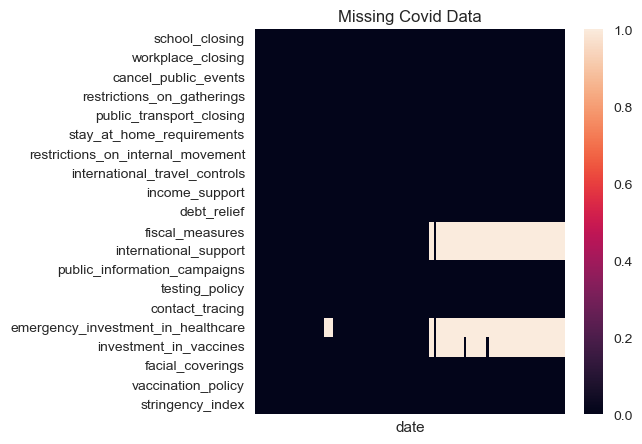

,First_Data_Date,Last_Data_Date,percent,min_max_variance,min,max,mean
contact_tracing,2020-02-03,2022-07-07,0,0,1,1,1
investment_in_vaccines,2020-02-03,2021-12-01,41.7607,0.0022,0,"9,000,000,000","31,100,775.1938"
international_support,2020-02-03,2021-07-05,43.1151,0.0022,0,"1,300,000,000","4,307,440.4762"
emergency_investment_in_healthcare,2020-02-03,2021-07-05,45.9368,0.0026,0,"242,400,000,000","849,454,592.9019"
fiscal_measures,2020-02-03,2021-07-05,43.228,0.0044,0,"1,957,600,000,000","10,606,759,443.34"
testing_policy,2020-02-03,2022-07-07,0,0.0307,0,3,2.8928
workplace_closing,2020-02-03,2022-07-07,0,0.0405,0,3,1.9718
stringency_index,2020-02-03,2022-07-07,0,0.0417,5.56,75.46,57.8901
public_information_campaigns,2020-02-03,2022-07-07,0,0.0452,0,2,1.9052
public_transport_closing,2020-02-03,2022-07-07,0,0.0462,0,1,0.9515


In [99]:
# Perform aggregation and styling and display the result

plt.figure(figsize=(5,5))
sns.heatmap(gov_response_df.isna().T,xticklabels = [], cbar=True)
plt.title("Missing Covid Data")
plt.show()


display(
        last_first_missing(gov_response_df, True).sort_values(by='min_max_variance')
                .style.background_gradient(cmap='coolwarm', subset='min_max_variance', vmin=0, vmax=.1)
                .format(lambda x: "{:,.4f}".format(x).rstrip('0').rstrip('.') if isinstance(x, (float, int)) else x)
        )


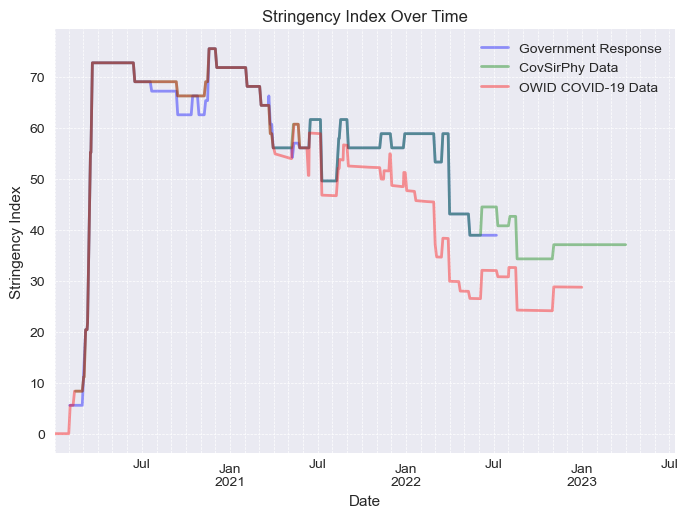

In [100]:
# Plot the 'stringency_index' from 'gov_response_df' with appropriate styling
gov_response_df.stringency_index.plot(color='blue', linewidth=2, alpha=.4, label='Government Response')

# Plot the 'stringency_index' from 'disease_df' with appropriate styling
disease_df.stringency_index.plot(color='green', linewidth=2, alpha=.4, label='CovSirPhy Data')

# Plot the 'stringency_index' from 'owid_cov' with appropriate styling
owid_cov.stringency_index.plot(color='red', linewidth=2, alpha=.4, label='OWID COVID-19 Data')

# Display the legend to indicate which line corresponds to each dataset
plt.legend()

# Add title and axis labels for clarity
plt.title('Stringency Index Over Time')
plt.xlabel('Date')
plt.ylabel('Stringency Index')

# Enhance grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()


In [101]:
# Identify columns common to 'disease_df' and 'gov_response_df'.
list_of_same_columns = list(disease_df.columns[disease_df.columns.isin(gov_response_df.columns)])
print(list_of_same_columns)

owid_cov.drop(columns=['stringency_index'], inplace=True)

['school_closing', 'stringency_index', 'testing_policy', 'workplace_closing']


In [102]:

# Identify columns common to 'disease_df' and 'gov_response_df'.
list_of_same_columns = list(disease_df.columns[disease_df.columns.isin(gov_response_df.columns)])
list_of_same_columns.extend(['fiscal_measures', 'international_support', 'investment_in_vaccines', 
            'emergency_investment_in_healthcare', 'cancel_public_events', 
            'restrictions_on_gatherings', 'restrictions_on_internal_movement', 
            'international_travel_controls', 'public_information_campaigns', 'stay_at_home_requirements',
            'public_transport_closing', 'income_support', 'debt_relief', 'contact_tracing', ])

print(list_of_same_columns)

# # Remove the common columns from 'gov_response_df'.
gov_response_df = gov_response_df.drop(columns = list_of_same_columns)


['school_closing', 'stringency_index', 'testing_policy', 'workplace_closing', 'fiscal_measures', 'international_support', 'investment_in_vaccines', 'emergency_investment_in_healthcare', 'cancel_public_events', 'restrictions_on_gatherings', 'restrictions_on_internal_movement', 'international_travel_controls', 'public_information_campaigns', 'stay_at_home_requirements', 'public_transport_closing', 'income_support', 'debt_relief', 'contact_tracing']


In [103]:

# Perform aggregation and styling on the remaining columns of 'gov_response_df', and display the result
display(gov_response_df.agg(['mean', 'min', 'max', min_max_variance])
                .T
                .sort_values('min_max_variance').head(15)
                .style
                .background_gradient(cmap='coolwarm', subset='min_max_variance', vmin=0, vmax=.1)
                .format(lambda x: "{:,.4f}".format(x).rstrip('0').rstrip('.') if isinstance(x, (float, int)) else x))


display(
        last_first_missing(gov_response_df, True).sort_values(by='min_max_variance')
                .style.background_gradient(cmap='coolwarm', subset='min_max_variance', vmin=0, vmax=.1)
                .format(lambda x: "{:,.4f}".format(x).rstrip('0').rstrip('.') if isinstance(x, (float, int)) else x)
        )


,mean,min,max,min_max_variance
facial_coverings,2.9786,0,4,0.0541
vaccination_policy,2.7156,0,5,0.2181


,First_Data_Date,Last_Data_Date,percent,min_max_variance,min,max,mean
facial_coverings,2020-02-03,2022-07-07,0,0.0541,0,4,2.9786
vaccination_policy,2020-02-03,2022-07-07,0,0.2181,0,5,2.7156


### <a id='toc4_2_4_'></a>[Hospitalization Data](#toc0_)

In [104]:
# Perform aggregation and styling on 'hospitalizations_df', and display the result

display(
        last_first_missing(hospitalizations_df, True).sort_values(by='min_max_variance')
                .style.background_gradient(cmap='coolwarm', subset='min_max_variance', vmin=0, vmax=.1)
                .format(lambda x: "{:,.4f}".format(x).rstrip('0').rstrip('.') if isinstance(x, (float, int)) else x)
        )


,First_Data_Date,Last_Data_Date,percent,min_max_variance,min,max,mean
new_intensive_care_patients,2020-02-10,2021-03-07,58.6934,0.0081,-29,"1,149",116.0077
new_ventilator_patients,2020-02-10,2021-03-07,58.6934,0.009,-20,113,10.9209
new_hospitalized_patients,2020-02-10,2022-09-15,0,0.0321,"-2,858","23,477","5,988.3446"
current_hospitalized_patients,2020-02-10,2022-09-15,0,0.0463,0,"154,513","47,470.2234"
current_intensive_care_patients,2020-02-10,2022-09-15,0,0.0719,0,"28,891","10,990.5933"
current_ventilator_patients,2020-02-10,2021-03-07,58.6934,0.0911,0,"8,004","3,529.0918"
cumulative_intensive_care_patients,2020-02-10,2021-03-07,58.6934,0.1005,0,"45,475","18,695.5408"
cumulative_ventilator_patients,2020-02-10,2021-03-07,58.6934,0.1129,0,"4,281","1,891.0995"
cumulative_hospitalized_patients,2020-02-10,2022-09-15,0,0.115,0,"5,504,812","2,414,105.9104"


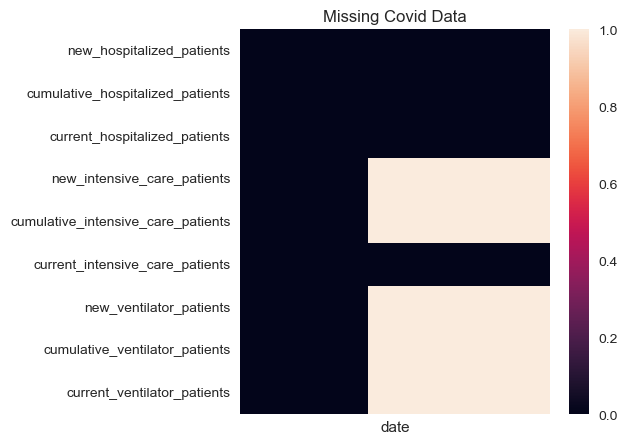

In [105]:
# Plot nulls
plt.figure(figsize=(5,5))
sns.heatmap(hospitalizations_df.isna().T,xticklabels = [], cbar=True)
plt.title("Missing Covid Data")
plt.show()

In [106]:
# Drop the specified columns from the 'hospitalizations_df' dataframe
hospitalizations_df.drop(columns=['new_intensive_care_patients', 'new_ventilator_patients', 'current_ventilator_patients'], inplace=True)

# Display the count of missing values for each column in 'hospitalizations_df'
# but only for rows with dates after '2021-01-01'
display(hospitalizations_df[hospitalizations_df.index > pd.to_datetime('2021-01-01')].isna().sum())


new_hospitalized_patients               0
cumulative_hospitalized_patients        0
current_hospitalized_patients           0
cumulative_intensive_care_patients    557
current_intensive_care_patients         0
cumulative_ventilator_patients        557
dtype: int64

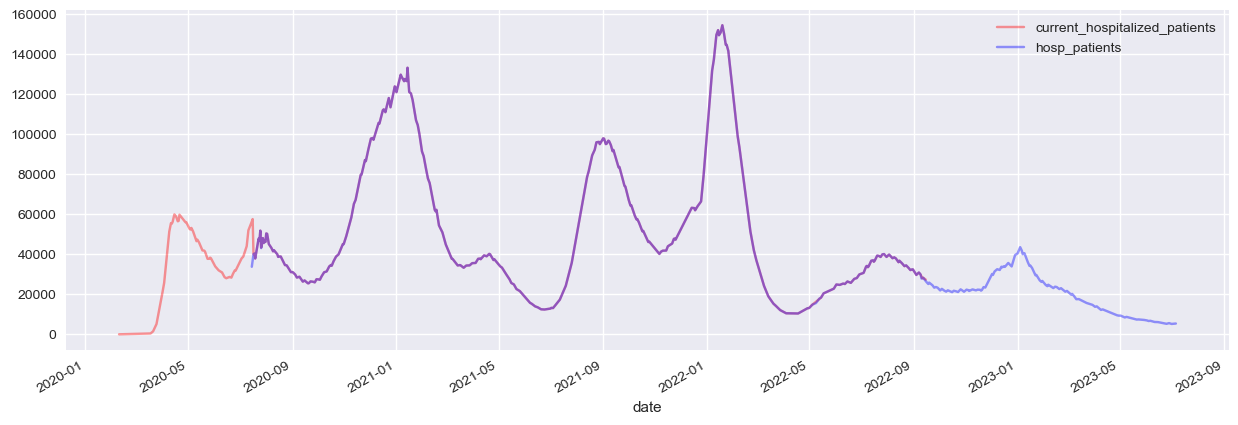

In [107]:
# Merge dataframes on 'hosp' related columns
investigation = pd.merge(hospitalizations_df.filter(regex=f'hosp'), owid_cov.filter(regex=f'hosp'), how='outer', on='date') 

# Plot 'current_hospitalized_patients' and 'hosp_patients' for comparison
investigation[['current_hospitalized_patients', 'hosp_patients']].plot(color=['red', 'blue'], figsize=(15, 5), alpha=.4)

# Fill missing values in 'hospitalizations_df' using 'owid_cov'
hospitalizations_df['current_hospitalized_patients'] = hospitalizations_df['current_hospitalized_patients'].fillna(owid_cov['hosp_patients'])


In [108]:
# Calculate all the correlations between each independent variables
hospitalizations_df.corr().style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)


,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,cumulative_intensive_care_patients,current_intensive_care_patients,cumulative_ventilator_patients
new_hospitalized_patients,1.000000,0.176814,0.920176,0.809281,0.836215,0.820915
cumulative_hospitalized_patients,0.176814,1.000000,0.013543,0.938068,-0.153737,0.903394
current_hospitalized_patients,0.920176,0.013543,1.000000,0.729417,0.945945,0.715918
cumulative_intensive_care_patients,0.809281,0.938068,0.729417,1.000000,0.753004,0.993970
current_intensive_care_patients,0.836215,-0.153737,0.945945,0.753004,1.000000,0.744672
cumulative_ventilator_patients,0.820915,0.903394,0.715918,0.993970,0.744672,1.000000


In [109]:
# collinear columns dropped
hospitalizations_df = hospitalizations_df.drop(columns = ['cumulative_intensive_care_patients', 'cumulative_ventilator_patients'])


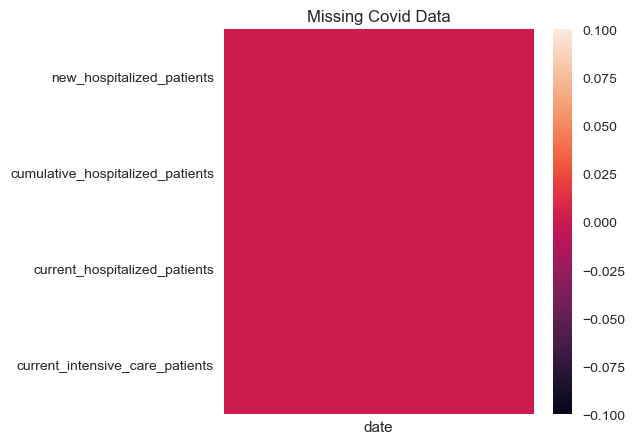

In [110]:
# Plot nulls
plt.figure(figsize=(5,5))
sns.heatmap(hospitalizations_df.isna().T,xticklabels = [], cbar=True)
plt.title("Missing Covid Data")
plt.show()

### <a id='toc4_2_5_'></a>[Final Merging of Datasets](#toc0_)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1142 entries, 2020-02-15 to 2023-04-01
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   cancel_events                         1142 non-null   Float64
 1   gatherings_restrictions               1142 non-null   Float64
 2   infected                              1142 non-null   Int64  
 3   information_campaigns                 1142 non-null   Float64
 4   internal_movement_restrictions        1142 non-null   Float64
 5   international_movement_restrictions   1142 non-null   Float64
 6   school_closing                        1142 non-null   Float64
 7   stay_home_restrictions                1142 non-null   Float64
 8   stringency_index                      1142 non-null   Float64
 9   susceptible                           1142 non-null   Float64
 10  testing_policy                        1142 non-null   Float64
 11 

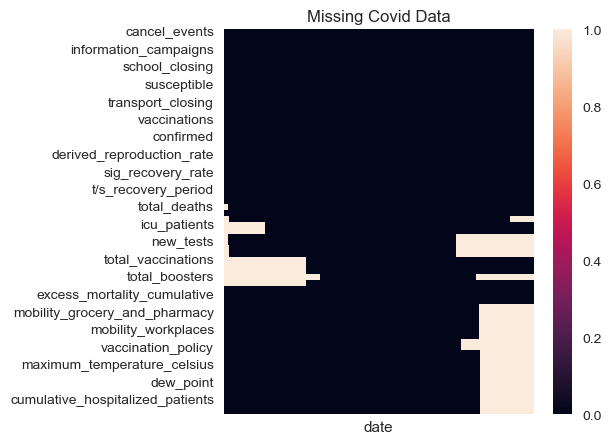

In [111]:
# Recreate Master DF
# Create a list of dataframes to be merged
time_series_dfs = [disease_df, owid_cov, mobility_df, gov_response_df, weather_df, hospitalizations_df]

# Use functools.reduce to merge all dataframes in the list on 'date' column, with 'left' join method
master_df = reduce(lambda a, b: pd.merge(a, b, how='left', right_on='date', left_on='date', suffixes=['_owid', '_gov_respons']), time_series_dfs)

# Display summary and first few rows of the master dataframe
master_df.info()

#plot nulls
plt.figure(figsize=(5,5))
sns.heatmap(master_df.isna().T,xticklabels = [])
plt.title("Missing Covid Data")
plt.show()


In [112]:
# Glance at data
display(last_first_missing(master_df, True).sort_values(by='min_max_variance').head(15)
                .style.background_gradient(cmap='coolwarm', subset='min_max_variance', vmin=0, vmax=.1)
                .format(lambda x: "{:,.4f}".format(x).rstrip('0').rstrip('.') if isinstance(x, (float, int)) else x)
        )


,First_Data_Date,Last_Data_Date,percent,min_max_variance,min,max,mean
rainfall_mm,2020-02-15,2022-09-14,17.4256,0.0042,0,68.4107,1.5438
mobility_grocery_and_pharmacy,2020-02-15,2022-09-12,17.6007,0.006,-61,36,-2.5303
new_cases,2020-02-15,2023-04-01,0,0.0102,0,"1,265,520","90,082.2259"
mobility_retail_and_recreation,2020-02-15,2022-09-12,17.6007,0.0128,-82,14,-12.6355
t/k_mortality_period,2020-02-15,2023-04-01,0,0.0132,165.9977,"31,155.0286","2,315.1555"
t/r_infection_period,2020-02-15,2023-04-01,0,0.0161,4.3304,67.6059,13.7974
reproduction_rate,2020-03-05,2023-01-02,9.4571,0.0161,0.52,3.61,1.0809
derived_reproduction_rate,2020-02-15,2023-04-01,0,0.0171,0.1607,35.4668,2.2761
infected,2020-02-15,2023-04-01,0,0.0194,15,"13,384,650","1,529,243.3205"
snowfall_mm,2020-02-15,2022-09-14,17.4256,0.0204,0,239.6067,8.1946


In [113]:
# Initialize an empty dataframe to hold the column names
df_columns = pd.DataFrame()

# Iterate over each dataframe in the list and add their column names to df_columns
for i, df in enumerate(time_series_dfs):
    df_name = [x for x in globals() if globals()[x] is df][0]
    df_columns[df_name] = pd.Series(df.columns)

df_columns.fillna('', inplace=True)

# Display the dataframe
def highlight_string(data, string="your_string", color='yellow'):
    attr = f'background-color: {color}'
    return np.where(data.str.contains(string), attr, '')



In [114]:
drop_list = ['vaccinations_boosters', 'vaccinated_full', 'vaccinated_once', 'vaccinations', 'new_deaths', 'total_deaths',
        'total_cases', 'new_cases', 'tests', 'vaccinations_boosters']

checking = 'inten|icu' # total_test|positive|

display(df_columns.style.apply(highlight_string, string=checking, color='yellow'))


,disease_df,owid_cov,mobility_df,gov_response_df,weather_df,hospitalizations_df
0,cancel_events,total_cases,mobility_retail_and_recreation,facial_coverings,average_temperature_celsius,new_hospitalized_patients
1,gatherings_restrictions,new_cases,mobility_grocery_and_pharmacy,vaccination_policy,minimum_temperature_celsius,cumulative_hospitalized_patients
2,infected,total_deaths,mobility_parks,,maximum_temperature_celsius,current_hospitalized_patients
3,information_campaigns,new_deaths,mobility_transit_stations,,rainfall_mm,current_intensive_care_patients
4,internal_movement_restrictions,reproduction_rate,mobility_workplaces,,snowfall_mm,
5,international_movement_restrictions,icu_patients,mobility_residential,,dew_point,
6,school_closing,hosp_patients,,,relative_humidity,
7,stay_home_restrictions,total_tests,,,,
8,stringency_index,new_tests,,,,
9,susceptible,positive_rate,,,,


,icu_patients,current_intensive_care_patients
icu_patients,1.000000,0.999984
current_intensive_care_patients,0.999984,1.000000


,First_Data_Date,Last_Data_Date,percent,min_max_variance,min,max,mean
current_intensive_care_patients,2020-02-15,2022-09-15,17.338004,0.071481,0.000000,28891.000000,11048.806144
icu_patients,2020-07-15,2023-04-01,13.222417,0.081866,1432.000000,28891.000000,10087.655903


<Axes: xlabel='date'>

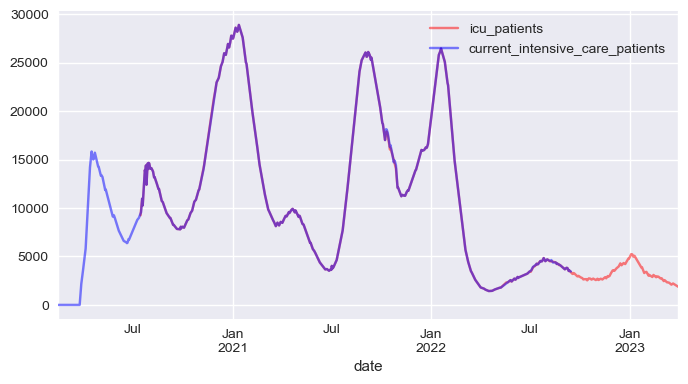

In [115]:
# Filter columns in 'master_df' based on a regular expression pattern
evaluation_df = master_df.filter(regex=f'{checking}')

# Display correlation matrix of 'evaluation_df' with background gradient styling
display(evaluation_df.corr().style.background_gradient(cmap='coolwarm'))

# Display missing values summary of 'evaluation_df' with background gradient styling
display(last_first_missing(evaluation_df, True).style.background_gradient(cmap='coolwarm'))

master_df.filter(regex=f'{checking}').plot(alpha=.5, figsize=(8, 4), color=['red', 'blue', 'orange', 'pink', 'green', 'black'])

# (evaluation_df.fatal + evaluation_df.confirmed + master_df.recovered - evaluation_df.total_cases) #.plot() 

WHY IS THERE SSUCH A BIG GAP here between confirmed and total cases???

### <a id='toc4_2_6_'></a>[Master Cleaning](#toc0_)

,First_Data_Date,Last_Data_Date,percent,min_max_variance
new_hospitalized_patients,2020-02-15,2022-09-15,17.338004,0.031952
cumulative_hospitalized_patients,2020-02-15,2022-09-15,17.338004,0.114625
current_hospitalized_patients,2020-02-15,2022-09-15,17.338004,0.046069
hosp_patients,2020-07-15,2023-04-01,13.222417,0.049650


,First_Data_Date,Last_Data_Date,percent,min_max_variance
new_hospitalized_patients,2020-02-15,2022-09-15,17.338004,0.031952
cumulative_hospitalized_patients,2020-02-15,2022-09-15,17.338004,0.114625
hosp_patients,2020-07-15,2023-04-01,13.222417,0.049650
current_hospitalized_patients,2020-02-15,2023-04-01,0.000000,0.041355


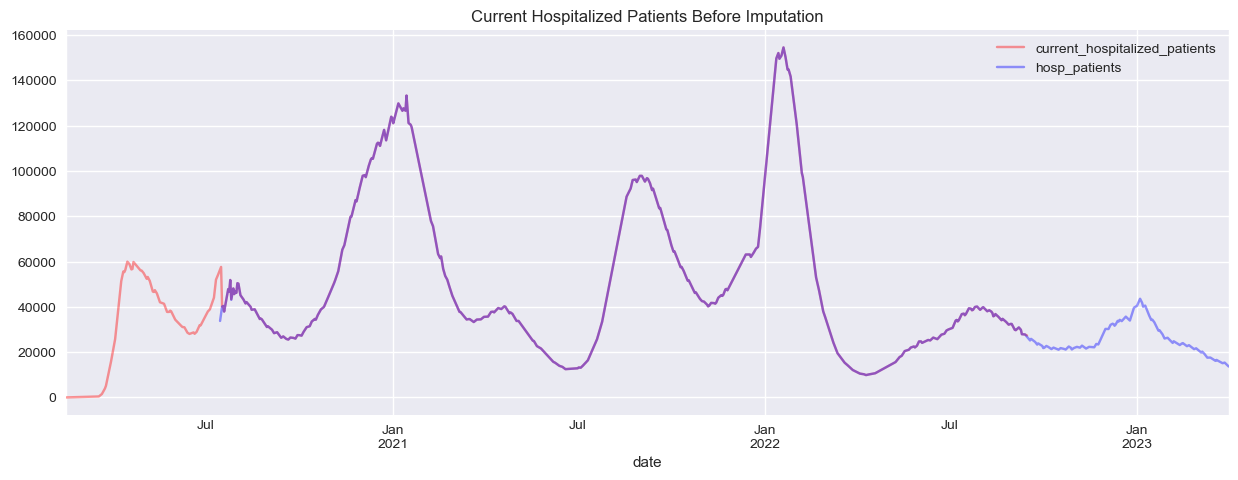

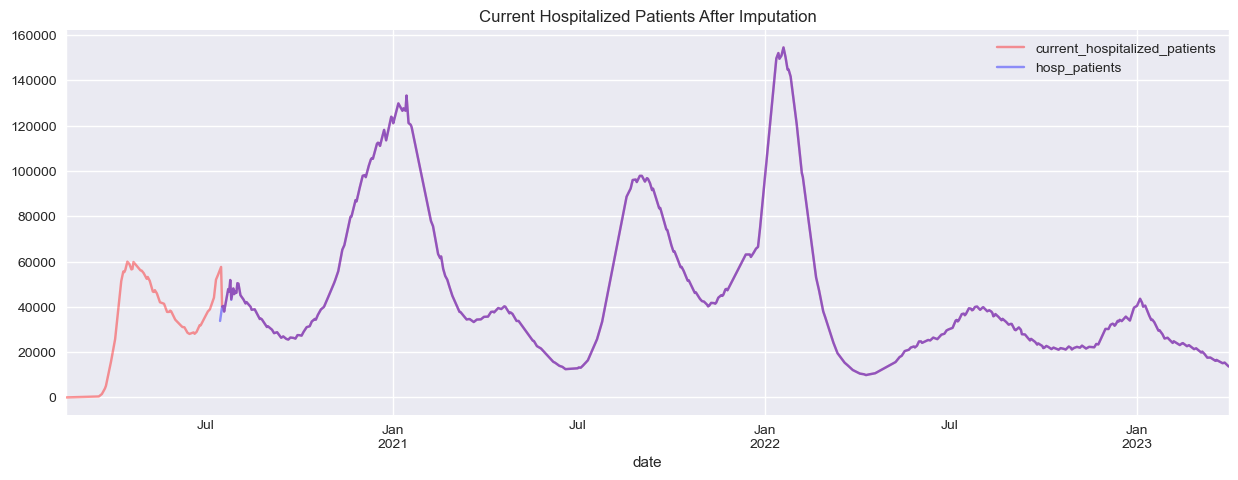

In [116]:
# # Display missing values summary of columns containing 'hosp' in their name from 'master_df' with background gradient styling
display(last_first_missing(master_df.filter(regex=f'hosp')).style.background_gradient(cmap='coolwarm'))

# # Plot 'current_hospitalized_patients' and 'hosp_patients' columns with two colors, specifying figure size and transparency
master_df[['current_hospitalized_patients', 'hosp_patients']].plot(color=['red', 'blue'], figsize=(15, 5), alpha=.4, title='Current Hospitalized Patients Before Imputation')

# # Combine 'current_hospitalized_patients' and 'hosp_patients' columns in 'master_df', filling missing values
master_df['current_hospitalized_patients'] = master_df['current_hospitalized_patients'].combine_first(master_df['hosp_patients'])

# # Plot 'current_hospitalized_patients' and 'hosp_patients' columns with two colors, specifying figure size and transparency
master_df[['current_hospitalized_patients', 'hosp_patients']].plot(color=['red', 'blue'], figsize=(15, 5), alpha=.4, title='Current Hospitalized Patients After Imputation')

display(last_first_missing(master_df.filter(regex=f'hosp')).style.background_gradient(cmap='coolwarm'))

master_df = master_df.drop(columns='hosp_patients')

,First_Data_Date,Last_Data_Date,percent,min_max_variance
current_intensive_care_patients,2020-02-15,2022-09-15,17.338004,0.071481
icu_patients,2020-07-15,2023-04-01,13.222417,0.081866


,First_Data_Date,Last_Data_Date,percent,min_max_variance
icu_patients,2020-07-15,2023-04-01,13.222417,0.081866
current_intensive_care_patients,2020-02-15,2023-04-01,0.000000,0.069803


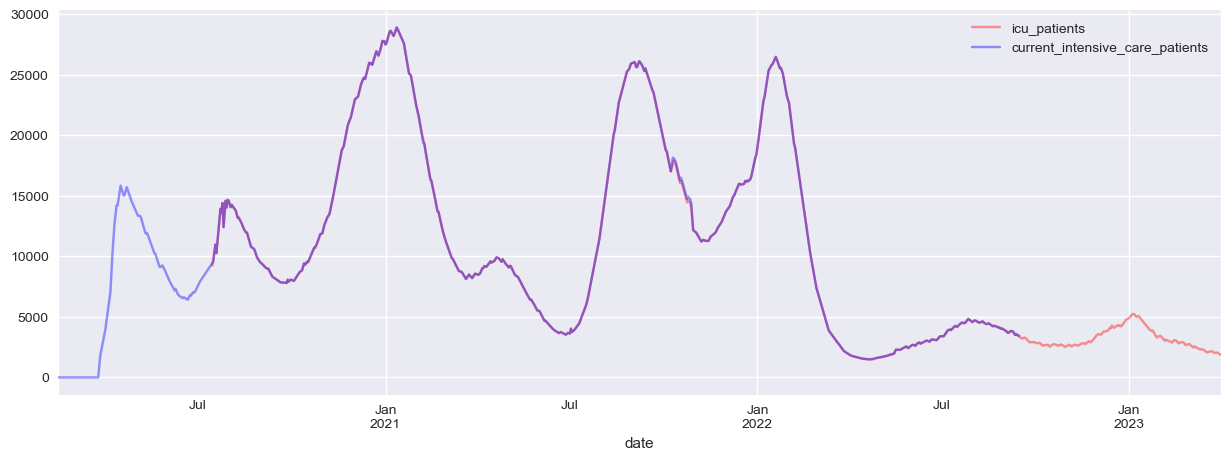

In [117]:
# Display missing values summary of columns containing 'icu' or 'intens' in their name from 'master_df' with background gradient styling
display(last_first_missing(master_df.filter(regex=f'icu|intens')).style.background_gradient(cmap='coolwarm'))

# Plot columns containing 'icu' or 'intens' in their name, excluding 'cumulative_intensive_care_patients', with two colors, specifying figure size and transparency
master_df.filter(regex=f'icu|intens').plot(color=['red', 'blue'], figsize=(15, 5), alpha=.4)

# Combine 'current_intensive_care_patients' and 'icu_patients' columns in 'master_df', filling missing values
master_df['current_intensive_care_patients'] = master_df['current_intensive_care_patients'].fillna(master_df['icu_patients'])

# Display missing values summary of columns containing 'icu' or 'intens' in their name from 'master_df' with background gradient styling
display(last_first_missing(master_df.filter(regex=f'icu|intens')).style.background_gradient(cmap='coolwarm'))

master_df = master_df.drop(columns='icu_patients')

# <a id='toc5_'></a>[Resume Here](#toc0_)

,derived_reproduction_rate,reproduction_rate
derived_reproduction_rate,1.000000,0.939537
reproduction_rate,0.939537,1.000000


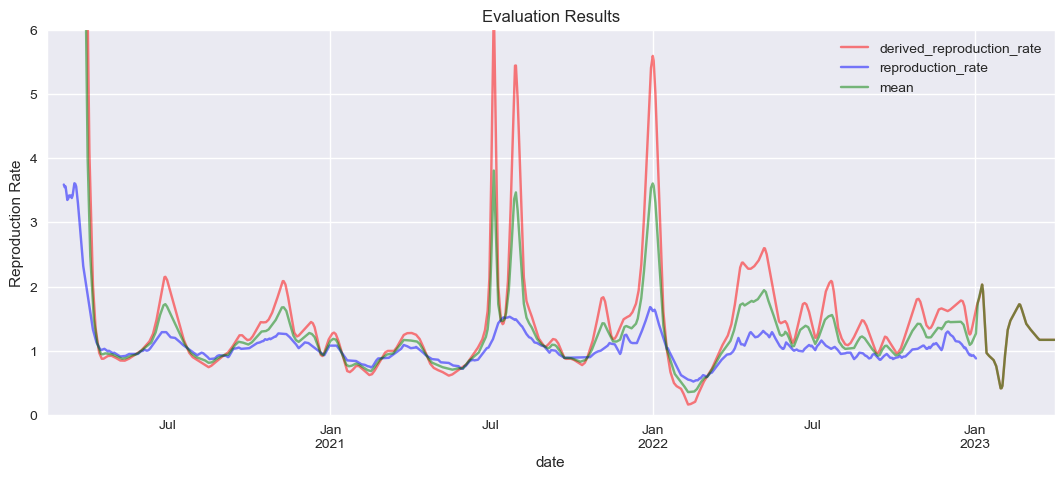

In [118]:

# Filter columns in 'master_df' based on a regular expression pattern
evaluation_df = master_df.filter(regex='reproduc')

# Display correlation matrix of 'evaluation_df' with background gradient styling
display(evaluation_df.corr().style.background_gradient(cmap='coolwarm'))

# Plot the evaluation_df DataFrame with transparency and custom colors
evaluation_df.plot(alpha=0.5, color=['red', 'blue', 'orange', 'pink', 'green', 'black'])

# Set the y-axis limits
plt.ylim(0, 6)

# Plot the mean of evaluation_df along the columns axis and label it as 'mean'
evaluation_df.mean(axis=1).plot(label='mean', color='green', figsize=(13, 5), alpha=0.5)

# # Add a legend to the plot
plt.legend()
plt.ylabel('Reproduction Rate')

# # Set the title of the graph
plt.title('Evaluation Results')

master_df = master_df.drop(columns = ['reproduction_rate'])

I decided to keep the derived reproduction rate because it had more variance and information, also I better understood where it was being derived from making the interpretabilty easier.

In [119]:

# Display the top 15 rows of columns in 'master_df' with missing data, sorted by the date of the first data entry
display(last_first_missing(master_df).query('percent > 0')\
    .sort_values(by='First_Data_Date', ascending=False)\
        .head(15).style.background_gradient(cmap='coolwarm'))

,First_Data_Date,Last_Data_Date,percent,min_max_variance
total_boosters,2021-02-04,2022-09-01,49.649737,0.160497
new_vaccinations,2020-12-14,2023-04-01,26.532399,0.034228
total_vaccinations,2020-12-13,2023-04-01,26.444834,0.088168
people_vaccinated,2020-12-13,2023-04-01,26.444834,0.079155
people_fully_vaccinated,2020-12-13,2023-04-01,26.444834,0.093268
positive_rate,2020-03-07,2022-06-18,26.970228,0.038199
tests_per_case,2020-03-07,2022-06-18,26.970228,0.040319
new_tests,2020-03-01,2022-06-18,26.444834,0.034794
total_tests,2020-03-01,2022-06-18,26.444834,0.106032
total_deaths,2020-02-29,2023-04-01,1.225919,0.104914


### <a id='toc5_1_1_'></a>[Remaining Null Values: Early Missing Data](#toc0_)

In [120]:
# Retrieve columns in 'master_df' with missing data and sort them by the date of their first data entry
lfm_df = last_first_missing(master_df).query('percent > 0').sort_values(by='First_Data_Date', ascending=False)

# Display columns with their first data entry after 2020-02-15 using a gradient color for visualization
lfm_df.loc[lfm_df.First_Data_Date > dt.date(2020, 2, 15), lfm_df.columns].style.background_gradient(cmap='coolwarm')


,First_Data_Date,Last_Data_Date,percent,min_max_variance
total_boosters,2021-02-04,2022-09-01,49.649737,0.160497
new_vaccinations,2020-12-14,2023-04-01,26.532399,0.034228
total_vaccinations,2020-12-13,2023-04-01,26.444834,0.088168
people_vaccinated,2020-12-13,2023-04-01,26.444834,0.079155
people_fully_vaccinated,2020-12-13,2023-04-01,26.444834,0.093268
positive_rate,2020-03-07,2022-06-18,26.970228,0.038199
tests_per_case,2020-03-07,2022-06-18,26.970228,0.040319
new_tests,2020-03-01,2022-06-18,26.444834,0.034794
total_tests,2020-03-01,2022-06-18,26.444834,0.106032
total_deaths,2020-02-29,2023-04-01,1.225919,0.104914


In [121]:
# Define columns related to vaccinations
zero_before_2021_02_05 = ['total_boosters', 'new_vaccinations', 'people_fully_vaccinated', 'total_vaccinations', 'people_vaccinated']

# Fill NaN values in vaccination columns with 0 for dates prior to 2021-02-15
master_df.loc[master_df.index.date < dt.date(2021, 2, 15), zero_before_2021_02_05] = \
    master_df.loc[master_df.index.date < dt.date(2021, 2, 15), zero_before_2021_02_05].fillna(0)

# Display the head of the processed data for dates prior to 2021-02-15
master_df.loc[master_df.index.date < dt.date(2021, 2, 15), zero_before_2021_02_05].head()


,total_boosters,new_vaccinations,people_fully_vaccinated,total_vaccinations,people_vaccinated
date,,,,,
2020-02-15,0.0,0.0,0.0,0.0,0.0
2020-02-16,0.0,0.0,0.0,0.0,0.0
2020-02-17,0.0,0.0,0.0,0.0,0.0
2020-02-18,0.0,0.0,0.0,0.0,0.0
2020-02-19,0.0,0.0,0.0,0.0,0.0


In [122]:
# Define columns to backfill NaN values for dates before 2021-02-15
bfill_before_2020_04_01 = ['tests_per_case', 'positive_rate']

# Backfill NaN values for the specified columns for dates prior to 2021-02-15
master_df.loc[master_df.index.date < dt.date(2021, 2, 15), bfill_before_2020_04_01] = \
    master_df.loc[master_df.index.date < dt.date(2021, 2, 15), bfill_before_2020_04_01].fillna(method='bfill')

# Display the head of the backfilled data for dates prior to 2021-02-15
master_df.loc[master_df.index.date < dt.date(2021, 2, 15), bfill_before_2020_04_01].head()


,tests_per_case,positive_rate
date,,
2020-02-15,9.3,0.107
2020-02-16,9.3,0.107
2020-02-17,9.3,0.107
2020-02-18,9.3,0.107
2020-02-19,9.3,0.107


In [123]:
# Estimate 'new_tests' by multiplying 'tests_per_case' with 'confirmed' and fill NaNs in 'total_tests' using its cumulative sum.
master_df['new_tests'] = master_df['new_tests'].combine_first(master_df['tests_per_case'] * master_df['confirmed']) 

# Compute cumulative sum of 'new_tests' and use it to fill missing values in the 'total_tests' column.
master_df['total_tests'] = master_df['total_tests'].combine_first(master_df['new_tests'].cumsum()) 


master_df[['new_tests', 'total_tests']].head()

,new_tests,total_tests
date,,
2020-02-15,139.5,139.5
2020-02-16,139.5,279.0
2020-02-17,232.5,511.5
2020-02-18,232.5,744.0
2020-02-19,232.5,976.5


In [124]:
# Display updated and styled subset of lfm_df where 'First_Data_Date' is after 2020-02-15.
lfm_df = last_first_missing(master_df).query('percent > 0').sort_values(by='First_Data_Date', ascending=False)

lfm_df.loc[lfm_df.First_Data_Date > dt.date(2020, 2, 15), lfm_df.columns].style.background_gradient(cmap='coolwarm')




,First_Data_Date,Last_Data_Date,percent,min_max_variance
total_deaths,2020-02-29,2023-04-01,1.225919,0.104914


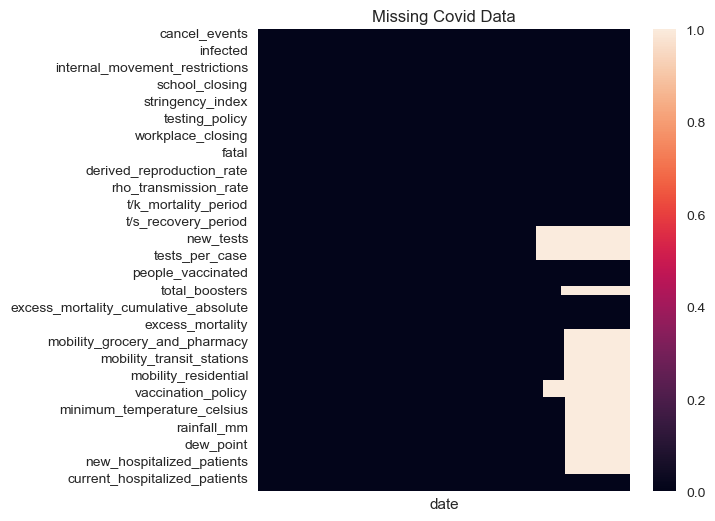

In [125]:
# Drop the columns that had been identified as not needed for the analysis
master_df = master_df.drop(columns=drop_list)

#heat map to see how much values need to updated
plt.figure(figsize=(6,6))
sns.heatmap(master_df.isna().T,xticklabels = [])
plt.title("Missing Covid Data")
plt.show()



### <a id='toc5_1_2_'></a>[Remaining Null Values: Later Missing Data](#toc0_)

In [126]:
# Filter the dataframe for entries with 'Last_Data_Date' before 2023-02-20, sort them by 'Last_Data_Date', and apply a background gradient for visualization
lfm_df.loc[lfm_df.Last_Data_Date < dt.date(2023, 2, 20), lfm_df.columns].sort_values('Last_Data_Date')\
    .style.background_gradient(cmap='coolwarm')


,First_Data_Date,Last_Data_Date,percent,min_max_variance
new_tests,2020-02-15,2022-06-18,25.131349,0.036165
total_tests,2020-02-15,2022-06-18,25.131349,0.107657
tests_per_case,2020-02-15,2022-06-18,25.131349,0.039764
positive_rate,2020-02-15,2022-06-18,25.131349,0.037409
vaccination_policy,2020-02-15,2022-07-07,23.467601,0.217027
facial_coverings,2020-02-15,2022-07-07,23.467601,0.047156
total_boosters,2020-02-15,2022-09-01,18.563923,0.138015
mobility_residential,2020-02-15,2022-09-12,17.600701,0.028336
mobility_retail_and_recreation,2020-02-15,2022-09-12,17.600701,0.012841
mobility_grocery_and_pharmacy,2020-02-15,2022-09-12,17.600701,0.005985


The problem with predicting things into the future is that... well that is exactly what I am trying to do in the first place with covid. I wanted to build my base model with all the variables I could before going into that.



## <a id='toc5_2_'></a>[Feature Engineering](#toc0_)

In [127]:
# # Day to Day Differences
master_df['new_confirmed'] = master_df['confirmed'].diff()
master_df['new_fatal'] = master_df['fatal'].diff()
master_df['new_recovered'] = master_df['recovered'].diff()
master_df['new_susceptible'] = master_df['susceptible'].diff()
master_df['total_removed'] = master_df['fatal'] + master_df['recovered']

# # Division and Ratios
# eng.div(numerator="Fatal", denominator="Total_Removed", new="Fatal_to_Total_Removed")



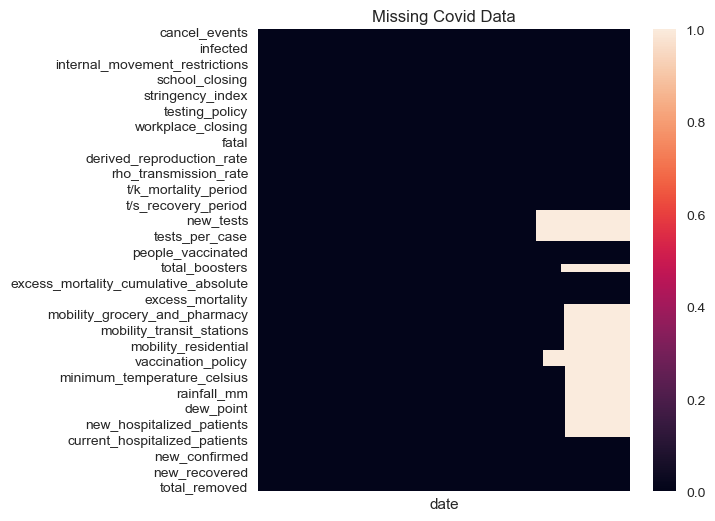

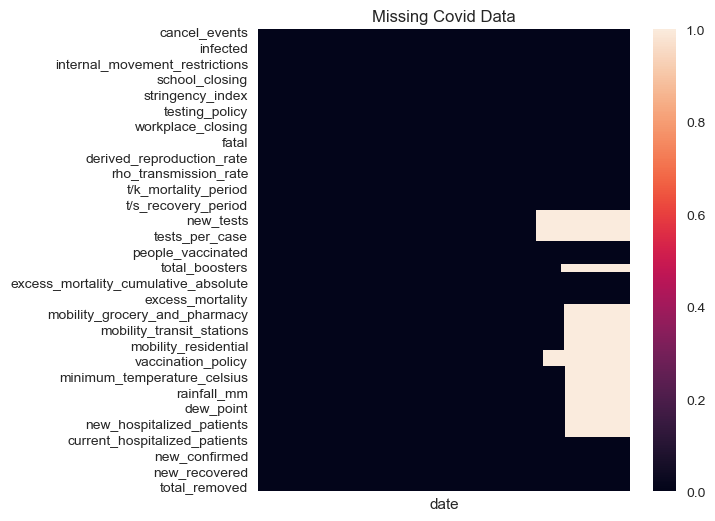

In [135]:
#heat map to see how much values need to updated
plt.figure(figsize=(6,6))
sns.heatmap(master_df.isna().T,xticklabels = [])
plt.title("Missing Covid Data")
plt.show()



master_df.fillna(method='backfill', inplace=True)

#heat map to see how much values need to updated
plt.figure(figsize=(6,6))
sns.heatmap(master_df.isna().T,xticklabels = [])
plt.title("Missing Covid Data")
plt.show()




Feature Engineering Done in Later Notebooks that was more optimal here

In [158]:
# 0. Reorganized Columns of Master_df
# Desired initial columns
initial_columns = ['new_confirmed', 'new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'new_fatal']

# Reorganize the columns
remaining_columns = sorted([col for col in master_df.columns if col not in initial_columns])
ordered_columns = initial_columns + remaining_columns

# Reorder the dataframe based on the new column order
master_df_ordered = master_df[ordered_columns].copy()

# 1. Horizon I choose to end my forecasts on
master_df_ordered = master_df_ordered[master_df_ordered.index < '2023-03-22'].copy()

# 2. Add new features using the 'create_features' function and drop some of them
master_df_ordered = pd.concat([master_df_ordered, 
                            create_features(master_df_ordered).drop(columns=['season','weekday','weekofyear', 'hour'])], 
                            axis=1).copy()

# 3. Calculate the bi-weekly difference for 'total_vaccinations' column
master_df_ordered['new_bi_weekly_vaccinations'] = master_df_ordered.loc[:,'total_vaccinations'].diff(15).fillna(0)

# 4. Fix some erroneous data types
for column in master_df_ordered.columns:
    if master_df_ordered[column].dtype == 'Float64':
        master_df_ordered[column] = master_df_ordered[column].astype('float32')
    
    if master_df_ordered[column].dtype == 'Int64':
        master_df_ordered[column] = master_df_ordered[column].astype('int32')

# 5. Check Changes
master_df_ordered.info()
master_df_ordered.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1131 entries, 2020-02-15 to 2023-03-21
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   new_confirmed                         1131 non-null   int32  
 1   new_hospitalized_patients             944 non-null    float64
 2   current_hospitalized_patients         1131 non-null   float64
 3   current_intensive_care_patients       1131 non-null   float64
 4   new_fatal                             1131 non-null   int32  
 5   average_temperature_celsius           943 non-null    float64
 6   cancel_events                         1131 non-null   float32
 7   confirmed                             1131 non-null   int32  
 8   cumulative_hospitalized_patients      944 non-null    float64
 9   derived_reproduction_rate             1131 non-null   float64
 10  dew_point                             943 non-null    float64
 11 

,new_confirmed,new_hospitalized_patients,current_hospitalized_patients,current_intensive_care_patients,new_fatal,average_temperature_celsius,cancel_events,confirmed,cumulative_hospitalized_patients,derived_reproduction_rate,...,transport_closing,vaccination_policy,workplace_closing,dayofweek,quarter,month,year,dayofyear,dayofmonth,new_bi_weekly_vaccinations
date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,0,0.0,0.0,0.0,0,0.956790,0.0,15,0.0,35.466825,...,0.0,0.0,0.0,5,1,2,2020,46,15,0.0
2020-02-16,0,0.0,0.0,0.0,0,3.919753,0.0,15,0.0,34.655107,...,0.0,0.0,0.0,6,1,2,2020,47,16,0.0
2020-02-17,10,0.0,0.0,0.0,0,6.197531,0.0,25,0.0,33.889042,...,0.0,0.0,0.0,0,1,2,2020,48,17,0.0
2020-02-18,0,0.0,0.0,0.0,0,0.592593,0.0,25,0.0,33.163907,...,0.0,0.0,0.0,1,1,2,2020,49,18,0.0
2020-02-19,0,0.0,0.0,0.0,0,-2.753086,0.0,25,0.0,32.475557,...,0.0,0.0,0.0,2,1,2,2020,50,19,0.0


In [159]:

# 1. Save the resulting dataframe as a parquet file
master_df_ordered.to_parquet('../Data/master_df.parquet', index=True)


Data Wireframe:

1. COVSirphy Data:
    - 'new_confirmed' (New Positive Cases) - the number of new confirmed cases of COVID-19, this includes some negative numbers to account for data corrections in the previous days, however because these numbers are aggregated accross a whole country, the negative numbers are often very small and remain positive
    - 'new_deceased' (New Deaths) - the number of new deaths due to COVID-19 also shares the negative number problem
    - 'new_hospitalized_patients' (New Hospitalizations) 
    - Epidemiologoical Variables

2. OWID Data:
   - 


3. Mobility Data:
    - 'mobility_retail_and_recreation'
    - 'mobility_grocery_and_pharmacy'
    - 'mobility_parks'
    - 'mobility_transit_stations'
    - 'mobility_workplaces'
    - 'mobility_residential'

4. Vaccination Data:
    - 'new_persons_vaccinated'
    - 'cumulative_persons_vaccinated'
    - 'new_persons_fully_vaccinated'
    - 'cumulative_persons_fully_vaccinated'
    - 'new_vaccine_doses_administered'
    - 'cumulative_vaccine_doses_administered'

5. Policy Measures:
    - 'school_closing'
    - 'workplace_closing'
    - 'cancel_public_events'
    - 'restrictions_on_gatherings'
    - 'public_transport_closing'
    - 'stay_at_home_requirements'
    - 'restrictions_on_internal_movement'
    - 'international_travel_controls'
    - 'income_support'
    - 'debt_relief'
    - 'fiscal_measures'
    - 'international_support'
    - 'public_information_campaigns'
    - 'testing_policy'
    - 'contact_tracing'
    - 'emergency_investment_in_healthcare'
    - 'investment_in_vaccines'
    - 'facial_coverings'
    - 'vaccination_policy'
    - 'stringency_index'

6. Weather Data:
    - 'average_temperature_celsius'
    - 'minimum_temperature_celsius'
    - 'maximum_temperature_celsius'
    - 'rainfall_mm'
    - 'snowfall_mm'
    - 'dew_point'
    - 'relative_humidity'



This dataframe provides a comprehensive snapshot of COVID-19 data, mobility metrics, government restrictions, and weather conditions for specific locations on specific dates. Here's a brief overview of the columns:

1. `Entry ID`: A unique identifier for each row in the dataframe.
2. `Date`: The date for the day on which the data was recorded.
3. `Location Key`: A code representing the location (10 different countries in total) for which the data is reported.

4. `New Confirmed`: The number of new confirmed COVID-19 cases on the given date.
5. `New Deceased`: The number of new COVID-19 related deaths on the given date.
6. `New Recovered`: The number of new recoveries from COVID-19 on the given date.
7. `New Tested`: The number of new COVID-19 tests conducted on the given date.
8. `New Hospitalizations`: The number of new hospitalizations due to COVID-19 on the given date.
9. `Current Hospitalizations`: The total number of current hospitalizations due to COVID-19 on the given date.

10. `Retail and Recreation Mobility (5+ other Mobility Metrics)`: A measure of mobility in retail and recreation spaces, along with 5 other columns related to different aspects of mobility.

11. `School Closing (19+ other Government Restrictions)`: A measure indicating whether schools were closed on the given date, along with 19 other columns related to different government restrictions.

12. `Average Temp (6+ Other Weather Columns)`: The average temperature on the given date, along with 6 other columns related to different weather conditions.

In total there are 9880 and 82 rows for 6.3mbs of data. The main way I could increase or decrease the size of the dataset would be to include more countries, regions, or counties in the analysis. For now this is my starter df.
